#1. 환경 설정, 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache-fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,716 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Sleep-Data

In [ ]:
sleep= pd.read_csv("/content/gdrive/My Drive/DSL/Sleep-Data.csv")
sleep.head(3)

,타임스탬프,나이가 어떻게 되시나요?,성별이 어떻게 되시나요?,현재 어떤 신분이신가요?,수면과 관련하여 어려움을 겪으시나요?,스마트 워치를 사용하시나요?,스마트 워치를 차고 주무시나요?,수면 어플을 써보신 적이 있으신가요?,어떤 어플을 쓰셨나요?,어플을 사용하신 이유가 무엇인가요?,가장 잠이 필요한 시기나 순간은 언제인가요? (ex. 시험 기간),잠을 잘 못 잘 때 어떤 방법으로 해결하시나요?,가장 잠이 필요한 시기나 순간은 언제인가요? (ex. 시험 기간).1,잠을 잘 못 잘 때 어떤 방법으로 해결하시나요?.1
0,11-21-2021 22:45:59,33,남성,직장인,3,아니오,아니오,아니오,NaN,NaN,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다
1,11-22-2021 0:44:14,25,여성,직장인,4,아니오,아니오,아니오,NaN,NaN,NaN,NaN,숙취해소,"캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭"
2,11-22-2021 8:23:51,24,여성,학생,6,아니오,아니오,네,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다,NaN,NaN


In [ ]:
sleep.columns

Index(['타임스탬프', '나이가 어떻게 되시나요?', '성별이 어떻게 되시나요?', '현재 어떤 신분이신가요?',
       '수면과 관련하여 어려움을 겪으시나요?', '스마트 워치를 사용하시나요?', '스마트 워치를 차고 주무시나요?',
       '수면 어플을 써보신 적이 있으신가요?', '어떤 어플을 쓰셨나요?', '어플을 사용하신 이유가 무엇인가요?',
       '가장 잠이 필요한 시기나 순간은 언제인가요? (ex. 시험 기간)', '잠을 잘 못 잘 때 어떤 방법으로 해결하시나요?',
       '가장 잠이 필요한 시기나 순간은 언제인가요? (ex. 시험 기간).1',
       '잠을 잘 못 잘 때 어떤 방법으로 해결하시나요?.1'],
      dtype='object')

In [ ]:
sleep['어떤 어플을 쓰셨나요?'].value_counts()

슬립사이클                     133
오토슬립                       50
필로우                        36
슬립워치                       13
슬립지                         7
                         ... 
Asmr  아무앱                   1
Sleep as android            1
애플 기본 건강어플                  1
샤오미 밴드(지금은 잃어버려서 못씀)        1
런타스틱 슬립베터(지금은 서비스 종료함)      1
Name: 어떤 어플을 쓰셨나요?, Length: 90, dtype: int64

-> 컬럼명을 간단하게 하고, 변수를 더미화 할 필요가 있다. 

#데이터 전처리

##Sleep data 전처리

In [ ]:
sleep.drop(['타임스탬프'],axis=1,inplace=True)
sleep.head(1)

,나이가 어떻게 되시나요?,성별이 어떻게 되시나요?,현재 어떤 신분이신가요?,수면과 관련하여 어려움을 겪으시나요?,스마트 워치를 사용하시나요?,스마트 워치를 차고 주무시나요?,수면 어플을 써보신 적이 있으신가요?,어떤 어플을 쓰셨나요?,어플을 사용하신 이유가 무엇인가요?,가장 잠이 필요한 시기나 순간은 언제인가요? (ex. 시험 기간),잠을 잘 못 잘 때 어떤 방법으로 해결하시나요?,가장 잠이 필요한 시기나 순간은 언제인가요? (ex. 시험 기간).1,잠을 잘 못 잘 때 어떤 방법으로 해결하시나요?.1
0,33,남성,직장인,3,아니오,아니오,아니오,NaN,NaN,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다


In [ ]:
#컬럼 정리
sleep.columns = ['나이','성별','직장','수면어려움정도','워치유저','워치착용슬립','어플사용유무','어플명','어플사용이유','잠필요시기','해결법','잠필요시기1','해결법1']

In [ ]:
sleep

,나이,성별,직장,수면어려움정도,워치유저,워치착용슬립,어플사용유무,어플명,어플사용이유,잠필요시기,해결법,잠필요시기1,해결법1
0,33,남성,직장인,3,아니오,아니오,아니오,NaN,NaN,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다
1,25,여성,직장인,4,아니오,아니오,아니오,NaN,NaN,NaN,NaN,숙취해소,"캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭"
2,24,여성,학생,6,아니오,아니오,네,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다,NaN,NaN
3,29,여성,직장인,8,예,아니오,아니오,NaN,NaN,NaN,NaN,매일,수면음악듣기
4,29,남성,직장인,8,예,예,아니오,NaN,NaN,NaN,NaN,마감이 많이 몰리는 월말 월초,일단 누워서 버텨봅니다ㅜ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,30,남성,직장인,4,아니오,아니오,아니오,NaN,NaN,NaN,NaN,매주중,편안한 수면 매트 교체
1262,30,여성,직장인,8,예,아니오,아니오,NaN,NaN,NaN,NaN,언제나,유튜브 시청
1263,22,여성,학생,7,아니오,아니오,아니오,NaN,NaN,NaN,NaN,"몸이 아플때, 방학기간때",속으로 숫자 세리거나 그냥 눈감고 가만히 있음
1264,23,남성,학생,7,아니오,아니오,아니오,NaN,NaN,NaN,NaN,항상 필요하다,유튜브 보다가 눈이 감길때 잔다


In [ ]:
#더미화할 아이들 더미화하기!
#워치 유저, 워치착용슬립,어플사용유무는 0,1로 더미화
#예는 1로, 아니오는 0으로!
A=sleep[sleep.워치유저.apply(lambda x : "예" in x)].index
B=sleep[sleep.워치유저.apply(lambda x : "아니오" in x)].index
sleep.loc[(sleep.index.isin(A)),'워치유저']=1
sleep.loc[(sleep.index.isin(B)),'워치유저']=0
sleep.head(1)

,나이,성별,직장,수면어려움정도,워치유저,워치착용슬립,어플사용유무,어플명,어플사용이유,잠필요시기,해결법,잠필요시기1,해결법1
0,33,남성,직장인,3,0,아니오,아니오,NaN,NaN,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다


In [ ]:
A=sleep[sleep.워치착용슬립.apply(lambda x : "예" in x)].index
B=sleep[sleep.워치착용슬립.apply(lambda x : "아니오" in x)].index
sleep.loc[(sleep.index.isin(A)),'워치착용슬립']=1
sleep.loc[(sleep.index.isin(B)),'워치착용슬립']=0
sleep.head(1)

,나이,성별,직장,수면어려움정도,워치유저,워치착용슬립,어플사용유무,어플명,어플사용이유,잠필요시기,해결법,잠필요시기1,해결법1
0,33,남성,직장인,3,0,0,아니오,NaN,NaN,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다


In [ ]:
A=sleep[sleep.어플사용유무.apply(lambda x : "네" in x)].index
B=sleep[sleep.어플사용유무.apply(lambda x : "아니오" in x)].index
sleep.loc[(sleep.index.isin(A)),'어플사용유무']=1
sleep.loc[(sleep.index.isin(B)),'어플사용유무']=0
sleep.head(1)

,나이,성별,직장,수면어려움정도,워치유저,워치착용슬립,어플사용유무,어플명,어플사용이유,잠필요시기,해결법,잠필요시기1,해결법1
0,33,남성,직장인,3,0,0,0,NaN,NaN,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다


In [ ]:
# 예 or 네/ 아니오가 1,0으로 더미화 잘 되었는지 확인
print(sleep['워치유저'].unique(),sleep['워치착용슬립'].unique(),sleep['어플사용유무'].unique())

[0 1] [0 1] [0 1]


In [ ]:
sleep.어플명[sleep['어플명'].isna()]='NO'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#어플명, 어플사용이유 컬럼추가해서 전처리하기
sleep['어플명'].unique()
# 슬립사이클, 필로우, 오토슬립, 슬립지, 슬립워치는 컬럼명으로 만들고 나머지는.. 고려!

array(['NO', '슬립사이클', '필로우', '없음', '삼성워치', 'Snoreclock', '예전에 스마트워치',
       '오토슬립', '자연소리 재생어플', 'sleep', 'sleep as android',
       'Do i snore and grind', '수면유도음악  및 빗소리등', '기억 안남',
       '기억안나는데..써봤어요..', '애플 건강 기본 앱', '애플 건강 앱 내 수면기능', '슬립워치',
       'SleepTime', '알람몬', '슬립지', '기억안남', '슬립스네일', '슬립모니터, 삼성 헬스 기본',
       '기억은 안나는데 수면 유도 asmr 앱', '애플 기본 건강어플', '슬립사이클, 슬립시어리', '명상앱',
       '삼성 헬스', '갤럭시 헬스 내장', '슬립사이클도 썼고, calm이라는 명상 어플로 수면유도명상 애용해요!',
       '유튜브', 'Sleep as Android', '스노어랩', '미밴드', 'Sleepytime', '모르겠어요',
       '아이폰 기본 수면 어플', '슬립모니터', '슬립타운', 'Sleep Time (수면 주기 스마트 알람 시계)',
       '잠 자는 시간 계산해주는 어플', '아이폰 건강앱', '샤오미 밴드(지금은 잃어버려서 못씀)', '기억이 안나용',
       'Bettersleep', '슬립 모니터', '기억안남.', '기억이 안나요', '가민', 'Asmr  아무앱',
       '아이폰 기본 앱', '핸드폰 기본 수면 어플', '삼성헬스', '삼성헬스, 녹음', '기억이 안나요...',
       'Asmr 어플(이름이 기억 안 나요...!)', '샤오미 미밴드에 있는 수면분석', '삼성헬스케어', '코골이 어플',
       '삼성헬스 슬립타운', '런타스틱 슬립베터(지금은 서비스 종료함)',
       '중복선택이 안돼 적습니다. (슬립사이클, 오토슬립)', '유튜브 채널', 'Sleep Monito

In [ ]:
pd.set_option('display.max_rows', None)

#### ✌ 컬럼명 어떻게 만들지 고려!!!!

In [ ]:
sleep['어플명'].value_counts()

NO                                        917
슬립사이클                                     133
오토슬립                                       50
필로우                                        36
슬립워치                                       13
슬립지                                         7
슬립모니터                                       6
기억안남                                        6
스노어랩                                        6
삼성헬스                                        5
삼성 헬스                                       3
미밴드                                         2
기억이 안나요                                     2
기억 안남                                       2
Sleep as Android                            2
Snoreclock                                  1
기억안남 ㅠ                                      1
Do i snore and grind                        1
clam                                        1
Sleep as android                            1
모르겠어요                                       1
애플 건강 앱 내 수면기능                    

In [ ]:
# NO가 917개이라면 어플사용X가 917개인지 확인!! (답변 제대로 했는지 확인)
sleep['어플사용유무'].value_counts()

0    917
1    349
Name: 어플사용유무, dtype: int64

오 완전 다행!! 총 1266명중 어플사용은 349명이며, 349명이 어떤 어플 사용하는지 답변해줌!

슬립사이클

In [ ]:
A=sleep[sleep.어플명.apply(lambda x : "슬립사이클" in x)].index
sleep['어플-슬립사이클']=0
sleep.loc[(sleep.index.isin(A)),'어플-슬립사이클']=1

필로우

In [ ]:
A=sleep[sleep.어플명.apply(lambda x : "필로우" in x)].index
sleep['어플-필로우']=0
sleep.loc[(sleep.index.isin(A)),'어플-필로우']=1

오토슬립

In [ ]:
A=sleep[sleep.어플명.apply(lambda x : "오토슬립" in x)].index
sleep['어플-오토슬립']=0
sleep.loc[(sleep.index.isin(A)),'어플-오토슬립']=1

슬립지

In [ ]:
A=sleep[sleep.어플명.apply(lambda x : "슬립지" in x)].index
sleep['어플-슬립지']=0
sleep.loc[(sleep.index.isin(A)),'어플-슬립지']=1

슬립워치

In [ ]:
A=sleep[sleep.어플명.apply(lambda x : "슬립워치" in x)].index
sleep['어플-슬립워치']=0
sleep.loc[(sleep.index.isin(A)),'어플-슬립워치']=1

#### ⭐ 위로 분류되지 않은 것 디테일하게 분석후 컬럼 만들기

선택지로 분류되지 않은 데이터 분류해야됨!

---


**방법1**
1. 스노어랩 (스노어랩, 코골이 어플)
2. 슬립모니터 10 (슬립모니터, 슬립 모니터, Sleep Moniotor)
3. Sleep as android (sleep as android, sleel as android, Sleep as Android, Sleep as android) -> **android, Android 로 분류하면 될듯**
4.삼성 (삼성, S헬스, 갤럭시)
5.워치 (워치 내, 스마트워치)
6.애플 (아이폰, 애플, 핸드폰 기본, 수면기능)
7.샤오미 (미밴드)

> 4,5,6,7을 묶을 수 있지 않을까??



8.calm 4 (calm, 명상, clam)

9.asmr (Asmr)

10.유튜브 (유튜브)

11.기타(기억, 런타스틱, 없음, 수면트래커, 슬립시어리, 트로스트, Sleep Time, SleepTime, 수면유도, 자연소리, 달팽이, Do i,Snoreclock, 알람몬, 가민, 슬립타운, Bettersleep, 네일)



In [ ]:
# +스노어랩
A=sleep[sleep.어플명.apply(lambda x : ("스노어랩" in x) | ("코골이" in x ))].index
sleep['어플-스노어랩']=0
sleep.loc[(sleep.index.isin(A)),'어플-스노어랩']=1
sleep['어플-스노어랩'].value_counts()

0    1259
1       7
Name: 어플-스노어랩, dtype: int64

In [ ]:
# +슬립모니터
A=sleep[sleep.어플명.apply(lambda x : ("슬립모니터" in x) | ("슬립 모니터" in x )| ("Sleep Monitor" in x))].index
sleep['어플-슬립모니터']=0
sleep.loc[(sleep.index.isin(A)),'어플-슬립모니터']=1
sleep['어플-슬립모니터'].value_counts()

0    1256
1      10
Name: 어플-슬립모니터, dtype: int64

In [ ]:
# +Sleep as android
A=sleep[sleep.어플명.apply(lambda x : ("android" in x) | ("Android" in x ))].index
sleep['어플-SaA']=0
sleep.loc[(sleep.index.isin(A)),'어플-SaA']=1
sleep['어플-SaA'].value_counts()

0    1261
1       5
Name: 어플-SaA, dtype: int64

In [ ]:
# +삼성
A=sleep[sleep.어플명.apply(lambda x :("삼성" in x) | ("S헬스" in x )| ("갤럭시" in x))].index
sleep['어플-삼성']=0
sleep.loc[(sleep.index.isin(A)),'어플-삼성']=1
sleep['어플-삼성'].value_counts()

0    1249
1      17
Name: 어플-삼성, dtype: int64

In [ ]:
# + 워치
A=sleep[sleep.어플명.apply(lambda x : ("워치 내" in x) | ("스마트워치" in x ))].index
sleep['어플-워치']=0
sleep.loc[(sleep.index.isin(A)),'어플-워치']=1
sleep['어플-워치'].value_counts()

0    1264
1       2
Name: 어플-워치, dtype: int64

In [ ]:
# + 애플(Apple) 아이폰, 애플, 핸드폰 기본, 수면기능
A=sleep[sleep.어플명.apply(lambda x : ("아이폰" in x) | ("애플" in x )| ("핸드폰 기본" in x)|("수면기능" in x))].index
sleep['어플-애플']=0
sleep.loc[(sleep.index.isin(A)),'어플-애플']=1
sleep['어플-애플'].value_counts()

0    1250
1      16
Name: 어플-애플, dtype: int64

In [ ]:
# + 샤오미 : 미밴드
A=sleep[sleep.어플명.apply(lambda x : "미밴드" in x)].index
sleep['어플-샤오미']=0
sleep.loc[(sleep.index.isin(A)),'어플-샤오미']=1
sleep['어플-샤오미'].value_counts()

0    1263
1       3
Name: 어플-샤오미, dtype: int64

In [ ]:
# calm (calm, 명상, clam)
A=sleep[sleep.어플명.apply(lambda x :("calm" in x) | ("명상" in x )| ("clam" in x))].index
sleep['어플-calm']=0
sleep.loc[(sleep.index.isin(A)),'어플-calm']=1
sleep['어플-calm'].value_counts()

0    1262
1       4
Name: 어플-calm, dtype: int64

In [ ]:
# Asmr (Asmr,asmr)
A=sleep[sleep.어플명.apply(lambda x :("Asmr" in x)| ("asmr" in x ) )].index
sleep['어플-Asmr']=0
sleep.loc[(sleep.index.isin(A)),'어플-Asmr']=1
sleep['어플-Asmr'].value_counts()

0    1263
1       3
Name: 어플-Asmr, dtype: int64

In [ ]:
# 유튜브(유튜브)
A=sleep[sleep.어플명.apply(lambda x :("유튜브" in x) )].index
sleep['어플-유튜브']=0
sleep.loc[(sleep.index.isin(A)),'어플-유튜브']=1
sleep['어플-유튜브'].value_counts()

0    1263
1       3
Name: 어플-유튜브, dtype: int64

In [ ]:
# 기타 (기억, 런타스틱, 없음, 수면트래커, 슬립시어리, 트로스트, Sleep Time, SleepTime, 수면유도, 자연소리, 달팽이, Do i,Snoreclock, 알람몬, 가민, 슬립타운, Bettersleep, 네일)
##주의할 점은 기억 -> 기억은 안나는데 asmr~ 이런 답변은 기타에서 제외하기!!!
A=sleep[sleep.어플명.apply(lambda x :("기억" in x)|("런타스틱" in x)| ("없음" in x)| ("수면트래커" in x)|("슬립시어리" in x)|("트로스트" in x)|("Sleep Time" in x)|
                        ("SleepTime" in x)| ("수면유도" in x)|("자연소리" in x)| ("달팽이" in x)| ("Do i" in x)| ("Snoreclock" in x)|("트로스트" in x)| ("알람몬" in x)|("가민" in x)|
                        ("슬립타운" in x)| ("Bettersleep" in x)| ("네일" in x))].index
sleep['어플-기타']=0
sleep.loc[(sleep.index.isin(A)),'어플-기타']=1
sleep['어플-기타'].value_counts()

0    1227
1      39
Name: 어플-기타, dtype: int64

In [ ]:
##주의할 점은 기억 -> 기억은 안나는데 asmr~ 이런 답변은 기타에서 제외하기!!!
sleep.loc[sleep['어플-Asmr']==1,'어플-기타']=0

#### 나이 숫자로 변환& 범주화
(세 같은거 있음), 나이 연령대로 범주화한 컬럼 만들기

In [ ]:
sleep['나이'].unique()

array(['33', '25', '24', '29', '28', '15', '27', '26', '32', '30', '26세',
       '22살', '22', '31', '36', '35', '20', '23', '21', '52', '53', '54',
       '51', '44', '50', '55', '56', '53세', '50대', '만23', '26살', '34',
       '52세', '20세', '67세', '23살', '49세', '46', '이재원', '19',
       '휘경동에 거주하고 있는 99년생, 23살 입니다', '49', '14', '56세', '만 24', '61',
       '13', '57', '19세', '23세', '18', '59', '허지은', '60', '51세', '17',
       '25살', '21살', '40', '24세', '만 21', '39', '67', '12살', '만 22',
       '10대', '64세', '66', '63', '만 50세', '230', '25세', '2001년생 21살입니다.',
       '최윤영', '만 22세', '현재 만20세 ', '2', '20살', '22살 ', '21(한국나이)',
       '만 20세', '28세', '22세', '만 24세', '이윤정', '21세 (만 20세)', '만 19세',
       '만24', '21세', '만 21세', '26살!', '24살', '65', '16', '45',
       '현재 만 19살입니다', '70'], dtype=object)

In [ ]:
sleep['나이'] = sleep['나이'].replace(['22살','26세','53세','50대','만23','26살','52세','20세','67세','23살','49세','휘경동에 거주하고 있는 99년생, 23살 입니다','56세',
                                   '만 24', '19세','23세','51세','25살','21살','24세','만 21', '12살', '만 22', '10대', '64세','만 50세', '230','25세',
                                   '2001년생 21살입니다.','만 22세','현재 만20세 ', '20살', '22살', '21(한국나이)', '만 20세', '28세', '22세', '만 24세', '21세 (만 20세)',
                                   '만 19세', '만24','21세','만 21세', '26살!','24살', '현재 만 19살입니다','22살 '],[22,26,53,55,25,26,52,20,67,23,49,23,56,26,19,23,51,25,21,24,23,12, 24,15,64,52,23,25,21,24,22,20,22,21,
                                                                                               22,28,22,26,21,21,26,21,23,26,24,21,22])
sleep['나이'].unique()

array(['33', '25', '24', '29', '28', '15', '27', '26', '32', '30', 26, 22,
       '22', '31', '36', '35', '20', '23', '21', '52', '53', '54', '51',
       '44', '50', '55', '56', 53, 55, 25, '34', 52, 20, 67, 23, 49, '46',
       '이재원', '19', '49', '14', 56, '61', '13', '57', 19, '18', '59',
       '허지은', '60', 51, '17', 21, '40', 24, '39', '67', 12, 15, 64, '66',
       '63', '최윤영', '2', 28, '이윤정', '65', '16', '45', '70'], dtype=object)

In [ ]:
sleep = sleep.query("나이 not in  ['이재원', '허지은','최윤영','이윤정']") #이름으로 답변한 행은 지워버리기..

In [ ]:
sleep['나이']=sleep['나이'].astype(int)
sleep['나이'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([33, 25, 24, 29, 28, 15, 27, 26, 32, 30, 22, 31, 36, 35, 20, 23, 21,
       52, 53, 54, 51, 44, 50, 55, 56, 34, 67, 49, 46, 19, 14, 61, 13, 57,
       18, 59, 60, 17, 40, 39, 12, 64, 66, 63,  2, 65, 16, 45, 70])

나이 범주화

In [ ]:
#10대
is_1=sleep['나이']>=10
is_2=sleep['나이']<=19
sleep['연령대']=0
sleep.loc[is_1&is_2,'연령대']='10대'
sleep['연령대'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array([0, '10대'], dtype=object)

In [ ]:
#20대
is_1=sleep['나이']>=20
is_2=sleep['나이']<=29
sleep.loc[is_1&is_2,'연령대']='20대'
sleep['연령대'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array([0, '20대', '10대'], dtype=object)

In [ ]:
#30대
is_1=sleep['나이']>=30
is_2=sleep['나이']<=39
sleep.loc[is_1&is_2,'연령대']='30대'
sleep['연령대'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array(['30대', '20대', '10대', 0], dtype=object)

In [ ]:
#40대
is_1=sleep['나이']>=40
is_2=sleep['나이']<=49
sleep.loc[is_1&is_2,'연령대']='40대'
sleep['연령대'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array(['30대', '20대', '10대', 0, '40대'], dtype=object)

In [ ]:
#50대
is_1=sleep['나이']>=50
is_2=sleep['나이']<=59
sleep.loc[is_1&is_2,'연령대']='50대'
sleep['연령대'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array(['30대', '20대', '10대', '50대', '40대', 0], dtype=object)

In [ ]:
#60세 이상
is_1=sleep['나이']>=60
sleep.loc[is_1,'연령대']='60세 이상'
sleep['연령대'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array(['30대', '20대', '10대', '50대', '40대', '60세 이상', 0], dtype=object)

In [ ]:
#0~9세
is_1=sleep['나이']<10
sleep.loc[is_1,'연령대']='10세 미만'
sleep['연령대'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array(['30대', '20대', '10대', '50대', '40대', '60세 이상', '10세 미만'],
      dtype=object)

In [ ]:
sleep.head(3)

,나이,성별,직장,수면어려움정도,워치유저,워치착용슬립,어플사용유무,어플명,어플사용이유,잠필요시기,해결법,잠필요시기1,해결법1,어플-슬립사이클,어플-필로우,어플-오토슬립,어플-슬립지,어플-슬립워치,어플-스노어랩,어플-슬립모니터,어플-SaA,어플-삼성,어플-워치,어플-애플,어플-샤오미,어플-calm,어플-Asmr,어플-유튜브,어플-기타,연령대
0,33,남성,직장인,3,0,0,0,NO,NaN,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30대
1,25,여성,직장인,4,0,0,0,NO,NaN,NaN,NaN,숙취해소,"캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대
2,24,여성,학생,6,0,0,1,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대


####사용이유 전처리

In [ ]:
sleep['어플사용이유'].unique()

array([nan, '수면 모니터링', '알람, 수면 모니터링', '수면 모니터링, 코골이, 이갈이 등 녹음', '알람',
       '수면 모니터링, 수면 분석 리포트', '알람, 수면 모니터링, 수면 유도',
       '알람, 수면 모니터링, 수면 분석 리포트', '알람, 수면 모니터링, 수면 분석 리포트, 수면 유도',
       '수면 모니터링, 수면 유도', '수면 분석 리포트',
       '알람, 수면 모니터링, 수면 분석 리포트, 수면 유도, 코골이, 이갈이 등 녹음', '수면 유도',
       '알람, 수면 모니터링, 코골이, 이갈이 등 녹음', '코골이, 이갈이 등 녹음', '알람, 수면 분석 리포트',
       '수면 분석 리포트, 코골이, 이갈이 등 녹음', '수면 모니터링, 수면 분석 리포트, 코골이, 이갈이 등 녹음',
       '알람, 수면 모니터링, 수면 분석 리포트, 코골이, 이갈이 등 녹음',
       '수면 모니터링, 수면 분석 리포트, 수면 유도', '알람, 수면 분석 리포트, 수면 유도',
       '알람, 코골이, 이갈이 등 녹음', '알람, 수면 유도', '알람, 수면 분석 리포트, 코골이, 이갈이 등 녹음',
       '수면 모니터링, 수면 분석 리포트, 수면 유도, 코골이, 이갈이 등 녹음'], dtype=object)

In [ ]:
sleep.어플사용이유[sleep['어플사용이유'].isna()]='NO'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [ ]:
A=sleep[sleep.어플사용이유.apply(lambda x : "알람" in x)].index
sleep['이유-알람']=0
sleep.loc[(sleep.index.isin(A)),'이유-알람']=1
sleep['이유-알람'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0    1155
1     107
Name: 이유-알람, dtype: int64

In [ ]:
A=sleep[sleep.어플사용이유.apply(lambda x : "수면 모니터링" in x)].index
sleep['이유-수면 모니터링']=0
sleep.loc[(sleep.index.isin(A)),'이유-수면 모니터링']=1
sleep['이유-수면 모니터링'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0    1043
1     219
Name: 이유-수면 모니터링, dtype: int64

In [ ]:
A=sleep[sleep.어플사용이유.apply(lambda x : "수면 분석 리포트" in x)].index
sleep['이유-수면 분석 리포트']=0
sleep.loc[(sleep.index.isin(A)),'이유-수면 분석 리포트']=1
sleep['이유-수면 분석 리포트'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0    1062
1     200
Name: 이유-수면 분석 리포트, dtype: int64

In [ ]:
A=sleep[sleep.어플사용이유.apply(lambda x : "수면 유도" in x)].index
sleep['이유-수면 유도']=0
sleep.loc[(sleep.index.isin(A)),'이유-수면 유도']=1
sleep['이유-수면 유도'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0    1203
1      59
Name: 이유-수면 유도, dtype: int64

In [ ]:
A=sleep[sleep.어플사용이유.apply(lambda x : "코골이, 이갈이 등 녹음" in x)].index
sleep['이유-코골이, 이갈이 등 녹음']=0
sleep.loc[(sleep.index.isin(A)),'이유-코골이, 이갈이 등 녹음']=1
sleep['이유-코골이, 이갈이 등 녹음'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0    1204
1      58
Name: 이유-코골이, 이갈이 등 녹음, dtype: int64

In [ ]:
sleep.head(5)

,나이,성별,직장,수면어려움정도,워치유저,워치착용슬립,어플사용유무,어플명,어플사용이유,잠필요시기,해결법,잠필요시기1,해결법1,어플-슬립사이클,어플-필로우,어플-오토슬립,어플-슬립지,어플-슬립워치,어플-스노어랩,어플-슬립모니터,어플-SaA,어플-삼성,어플-워치,어플-애플,어플-샤오미,어플-calm,어플-Asmr,어플-유튜브,어플-기타,연령대,이유-알람,이유-수면 모니터링,이유-수면 분석 리포트,이유-수면 유도,"이유-코골이, 이갈이 등 녹음"
0,33,남성,직장인,3,0,0,0,NO,NO,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30대,0,0,0,0,0
1,25,여성,직장인,4,0,0,0,NO,NO,NaN,NaN,숙취해소,"캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,0,0,0,0
2,24,여성,학생,6,0,0,1,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,1,0,0,0
3,29,여성,직장인,8,1,0,0,NO,NO,NaN,NaN,매일,수면음악듣기,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,0,0,0,0
4,29,남성,직장인,8,1,1,0,NO,NO,NaN,NaN,마감이 많이 몰리는 월말 월초,일단 누워서 버텨봅니다ㅜ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,0,0,0,0


In [ ]:
sleep

,나이,성별,직장,수면어려움정도,워치유저,워치착용슬립,어플사용유무,어플명,어플사용이유,잠필요시기,해결법,잠필요시기1,해결법1,어플-슬립사이클,어플-필로우,어플-오토슬립,어플-슬립지,어플-슬립워치,어플-스노어랩,어플-슬립모니터,어플-SaA,어플-삼성,어플-워치,어플-애플,어플-샤오미,어플-calm,어플-Asmr,어플-유튜브,어플-기타,연령대,이유-알람,이유-수면 모니터링,이유-수면 분석 리포트,이유-수면 유도,"이유-코골이, 이갈이 등 녹음"
0,33,남성,직장인,3,0,0,0,NO,NO,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30대,0,0,0,0,0
1,25,여성,직장인,4,0,0,0,NO,NO,NaN,NaN,숙취해소,"캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,0,0,0,0
2,24,여성,학생,6,0,0,1,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,1,0,0,0
3,29,여성,직장인,8,1,0,0,NO,NO,NaN,NaN,매일,수면음악듣기,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,0,0,0,0
4,29,남성,직장인,8,1,1,0,NO,NO,NaN,NaN,마감이 많이 몰리는 월말 월초,일단 누워서 버텨봅니다ㅜ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,0,0,0,0
5,28,남성,취준생,1,0,0,1,슬립사이클,"알람, 수면 모니터링","질문이 이해가 잘 안되는데, 시험기간이나 프로젝트 기간에 잠을 짧지만 효율적으로 자...",호흡에 집중합니다,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,1,1,0,0,0
6,15,남성,학생,7,0,0,0,NO,NO,NaN,NaN,지금,피곤하게 만든다,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10대,0,0,0,0,0
7,27,여성,직장인,8,1,0,1,필로우,"수면 모니터링, 코골이, 이갈이 등 녹음",평소,잠이 올 때까지 핸드폰을 한다.,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,1,0,0,1
8,26,여성,직장인,8,1,1,1,슬립사이클,수면 모니터링,평일,친구와 통화나 카톡하면 편한 친구의 익숙한 목소리가 잠오게 되더라고요,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,1,0,0,0
9,28,남성,취준생,9,1,0,1,없음,알람,밤낮이 바뀔때,다음날 일찍잠듬,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20대,1,0,0,0,0


내보내기!!

In [ ]:
sleep.to_csv('Sleep_전처리.csv',encoding='utf-8')

In [ ]:
sleep.to_csv('/content/gdrive/My Drive/DSL/sleep_전처리최종.csv',encoding='utf-8')

# 👀 Sleep 데이터 시각화

In [3]:
sleep= pd.read_csv("/content/gdrive/My Drive/DSL/sleep_전처리최종.csv",encoding='utf-8',index_col=0)
sleep.head(3)

,나이,성별,직장,수면어려움정도,워치유저,워치착용슬립,어플사용유무,어플명,어플사용이유,잠필요시기,해결법,잠필요시기1,해결법1,어플-슬립사이클,어플-필로우,어플-오토슬립,어플-슬립지,어플-슬립워치,어플-스노어랩,어플-슬립모니터,어플-SaA,어플-삼성,어플-워치,어플-애플,어플-샤오미,어플-calm,어플-Asmr,어플-유튜브,어플-기타,연령대,이유-알람,이유-수면 모니터링,이유-수면 분석 리포트,이유-수면 유도,"이유-코골이, 이갈이 등 녹음"
0,33,남성,직장인,3,0,0,0,NO,NO,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30대,0,0,0,0,0
1,25,여성,직장인,4,0,0,0,NO,NO,NaN,NaN,숙취해소,"캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,0,0,0,0
2,24,여성,학생,6,0,0,1,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,1,0,0,0


In [4]:
sleep.columns

Index(['나이', '성별', '직장', '수면어려움정도', '워치유저', '워치착용슬립', '어플사용유무', '어플명',
       '어플사용이유', '잠필요시기', '해결법', '잠필요시기1', '해결법1', '어플-슬립사이클', '어플-필로우',
       '어플-오토슬립', '어플-슬립지', '어플-슬립워치', '어플-스노어랩', '어플-슬립모니터', '어플-SaA',
       '어플-삼성', '어플-워치', '어플-애플', '어플-샤오미', '어플-calm', '어플-Asmr', '어플-유튜브',
       '어플-기타', '연령대', '이유-알람', '이유-수면 모니터링', '이유-수면 분석 리포트', '이유-수면 유도',
       '이유-코골이, 이갈이 등 녹음'],
      dtype='object')

##연령대별 답변율 체크

In [5]:
sleep['연령대'].value_counts()

20대       1124
30대         50
50대         41
10대         30
60세 이상       9
40대          7
10세 미만       1
Name: 연령대, dtype: int64

In [6]:
perce1=len(sleep[sleep['연령대']=='10세 미만'])/len(sleep)*100
perce2=len(sleep[sleep['연령대']=='10대'])/len(sleep)*100
perce3=len(sleep[sleep['연령대']=='20대'])/len(sleep)*100
perce4=len(sleep[sleep['연령대']=='30대'])/len(sleep)*100
perce5=len(sleep[sleep['연령대']=='40대'])/len(sleep)*100
perce6=len(sleep[sleep['연령대']=='50대'])/len(sleep)*100
perce7=len(sleep[sleep['연령대']=='60세 이상'])/len(sleep)*100

In [7]:
print(perce1,perce2,perce3,perce4,perce5,perce6,perce7)

0.07923930269413629 2.3771790808240887 89.06497622820919 3.9619651347068143 0.554675118858954 3.248811410459588 0.7131537242472267


In [8]:
age=pd.DataFrame({
    "연령대":['10세 미만','10대','20대','30대','40대','50대','60세 이상'],
    "답변율":[perce1,perce2,perce3,perce4,perce5,perce6,perce7]
})

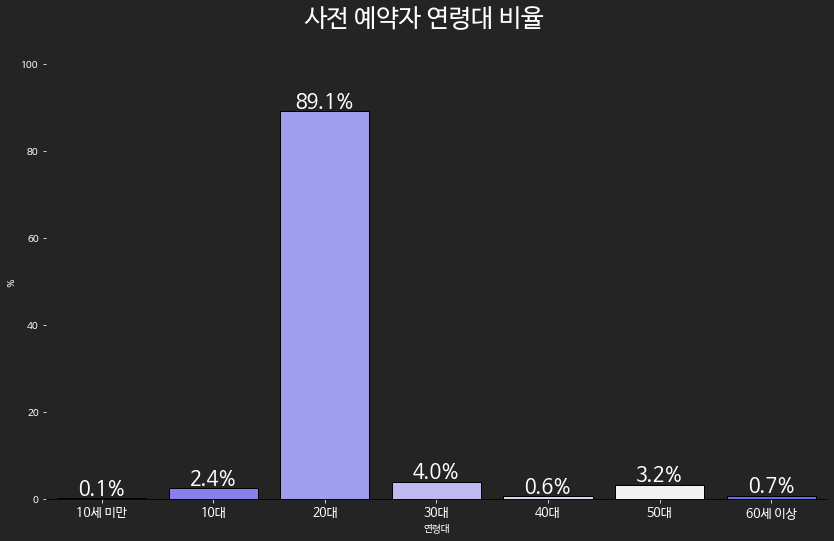

In [10]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="연령대",y="답변율",data=age,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{round(float(height),1)}%",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('연령대',color='white') #x축단어설정, 흰색
plt.ylabel('%',color='white') #x축단어설정, 흰색
plt.ylim(0,100)
plt.xticks(fontsize =12.5) 

#제목설정
plt.suptitle('사전 예약자 연령대 비율',color='white' ,size = 25)
plt.show()

**설문조사 링크가 SNS이므로, SNS 사용자를 크게 차지하는 20대 답변율이 큰 것을 확인할 수 있다.**

##어플 사용유무

In [11]:
app =sleep.groupby('어플사용유무',as_index=False)['나이'].count()
app['비율'] = app['나이'].div(1262/100)
app

,어플사용유무,나이,비율
0,0,914,72.424723
1,1,348,27.575277


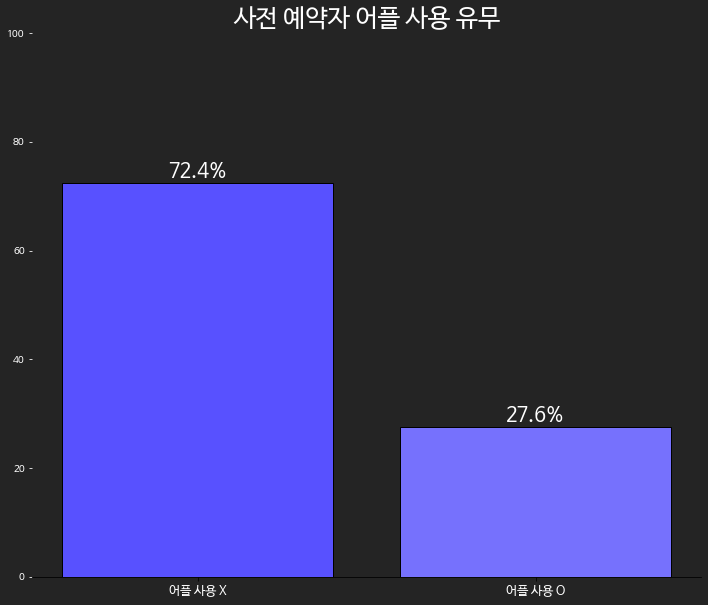

In [12]:
plt.figure(figsize=(12,10))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x = np.arange(2)
a = plt.bar(x, height = app['비율'],color=colors,edgecolor='black')

ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!

ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거

#ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색

plt.xticks(x, ['어플 사용 X', '어플 사용 O'], fontsize = 12.5, color = 'white')
plt.title('사전 예약자 어플 사용 유무', fontsize = 25, color = 'white')
plt.ylim([0,100])

# 숫자 넣는 부분
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='center', va='bottom', size = 20, color = 'white')
plt.show()

In [14]:
job = sleep.groupby('직장',as_index=False)['나이'].count()

In [15]:
job['비율'] = job['나이'].div(1262/100)

In [16]:
job_sort = job.sort_values('비율',ascending = False)

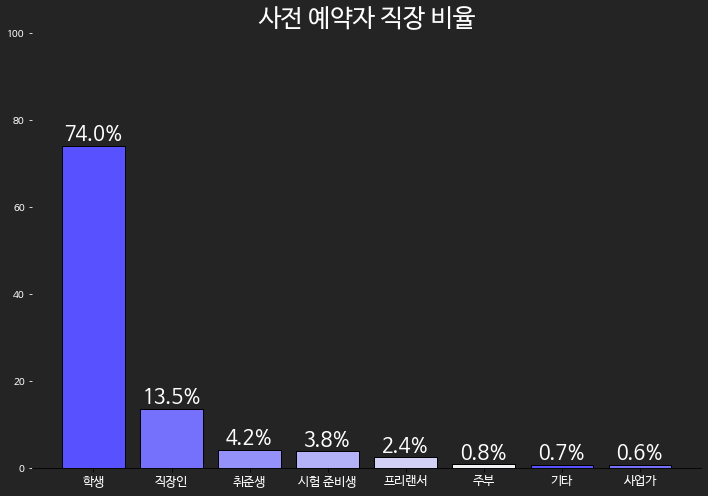

In [17]:
plt.figure(figsize=(12,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x = np.arange(8)
a = plt.bar(x, height = job_sort['비율'],color=colors,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!

ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거

#ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색

plt.xticks(x, job_sort['직장'], fontsize = 12.5, color = 'white')
plt.title('사전 예약자 직장 비율',fontsize = 25, color = 'white')
plt.ylim([0,100])

for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='center', va='bottom', size = 20, color = 'white')
plt.show()

## 직업 별 수면 어려움정도

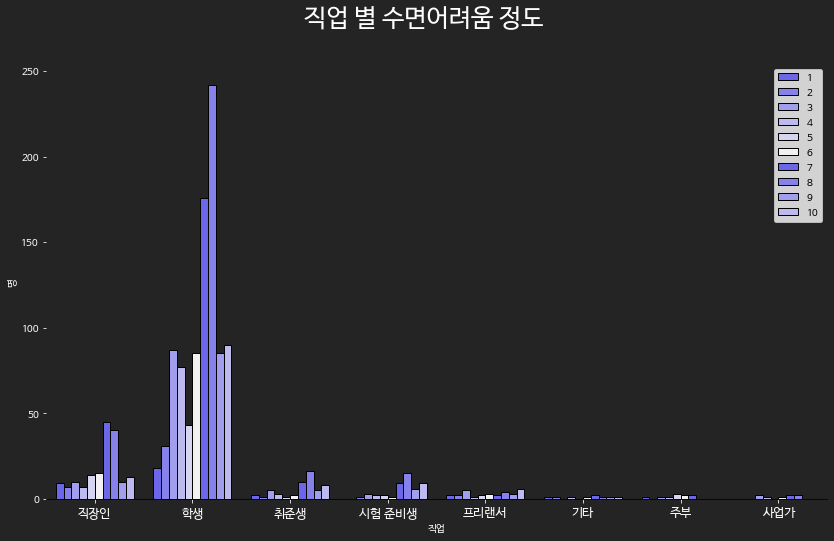

In [18]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.countplot(x="직장",hue="수면어려움정도", data=sleep,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거

ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('직업',color='white') #x축단어설정, 흰색
plt.ylabel('명',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 
plt.legend(loc='upper right', frameon=True)

#제목설정
plt.suptitle('직업 별 수면어려움 정도',color='white' ,size = 25)
plt.show()


### 직업이 수면어려움과 상관이 없는지 확인할 수 있는 패턴 분석

In [19]:
sleep['직장'].value_counts()

학생        934
직장인       170
취준생        53
시험 준비생     48
프리랜서       30
주부         10
기타          9
사업가         8
Name: 직장, dtype: int64

학생, 직장인, 취준생, 시험준비생, 프리랜서까지만 분석하면 좋을듯!

In [20]:
student=sleep[sleep['직장']=='학생']
worker=sleep[sleep['직장']=='직장인']
preworker=sleep[sleep['직장']=='취준생']
pretest=sleep[sleep['직장']=='시험 준비생']
free=sleep[sleep['직장']=='프리랜서']

In [21]:
student['count']=1
student_f=student.groupby(by=['수면어려움정도'],as_index=False).count()
worker['count']=1
worker_f=worker.groupby(by=['수면어려움정도'],as_index=False).count()
preworker['count']=1
preworker_f=preworker.groupby(by=['수면어려움정도'],as_index=False).count()
pretest['count']=1
pretest_f=pretest.groupby(by=['수면어려움정도'],as_index=False).count()
free['count']=1
free_f=free.groupby(by=['수면어려움정도'],as_index=False).count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [22]:
student_f['count']=student_f['count']/(len(student))
student_f['job']='학생'
worker_f['count']=worker_f['count']/(len(worker))
worker_f['job']='직장인'
preworker_f['count']=preworker_f['count']/(len(preworker))
preworker_f['job']='취준생'
pretest_f['count']=pretest_f['count']/(len(pretest))
pretest_f['job']='시험 준비생'
free_f['count']=free_f['count']/(len(free))
free_f['job']='프리랜서'

In [23]:
tot_job=pd.concat([student_f,worker_f,preworker_f,pretest_f,free_f], axis=0)

In [24]:
tot_job=tot_job.reindex(['job','count','수면어려움정도'],axis=1)
tot_job

,job,count,수면어려움정도
0,학생,0.019272,1
1,학생,0.033191,2
2,학생,0.093148,3
3,학생,0.082441,4
4,학생,0.046039,5
5,학생,0.091006,6
6,학생,0.188437,7
7,학생,0.259101,8
8,학생,0.091006,9
9,학생,0.096360,10


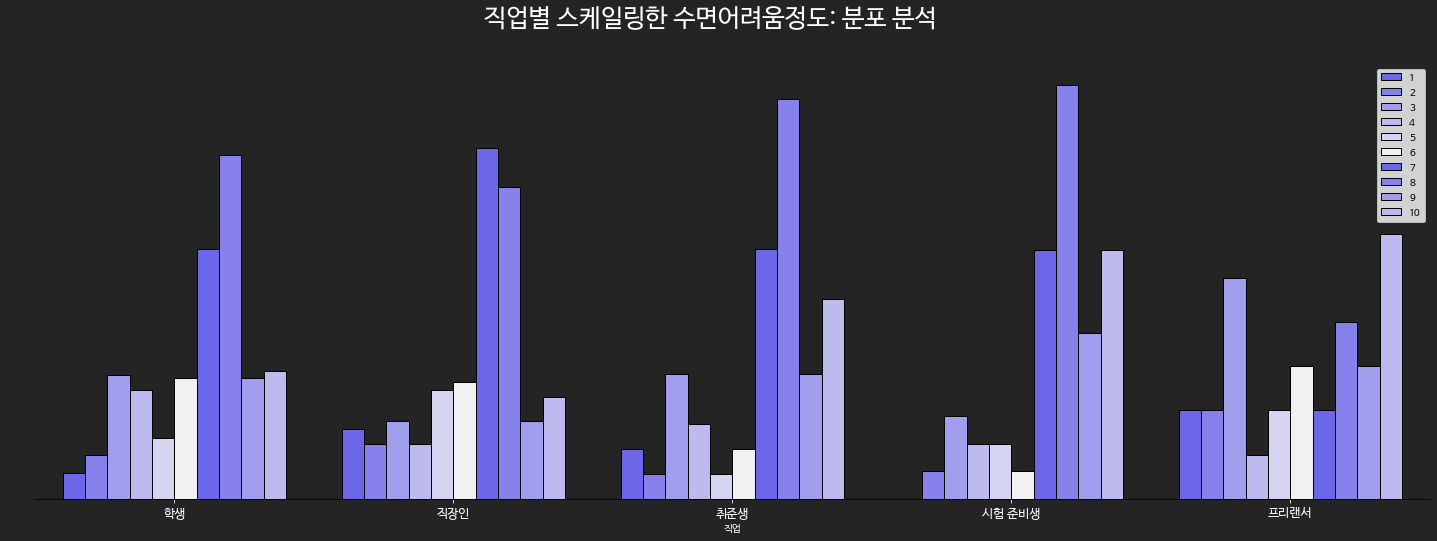

In [25]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(25,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="job",y="count",hue="수면어려움정도", data=tot_job,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거

ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y',colors='#242424') #y축 변수들 흰색
plt.xlabel('직업',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 
plt.legend(loc='upper right', frameon=True)

#제목설정
plt.suptitle('직업별 스케일링한 수면어려움정도: 분포 분석',color='white' ,size = 25)
plt.show()

# **어떤 이유를 가지고 어떤 어플을 사용하는지**

In [26]:
app_list = []

for i in list(sleep.columns):
    if i[:3] == '어플-':
        app_list.append(i)

In [27]:
app_dict = {}

for i in app_list:
    num = sleep[i][sleep[i]==1].count()
    app_dict[i[3:]] = num

app_df = pd.DataFrame({'어플':list(app_dict.keys()), '수':list(app_dict.values())})

In [28]:
reason_list = []

for i in list(sleep.columns):
    if i[:3] == '이유-':
        reason_list.append(i)

In [29]:
reason_dict = {}

for i in reason_list:
    num = sleep[i][sleep[i]==1].count()
    reason_dict[i[3:]] = num

reason_df = pd.DataFrame({'이유':list(reason_dict.keys()), '수':list(reason_dict.values())})

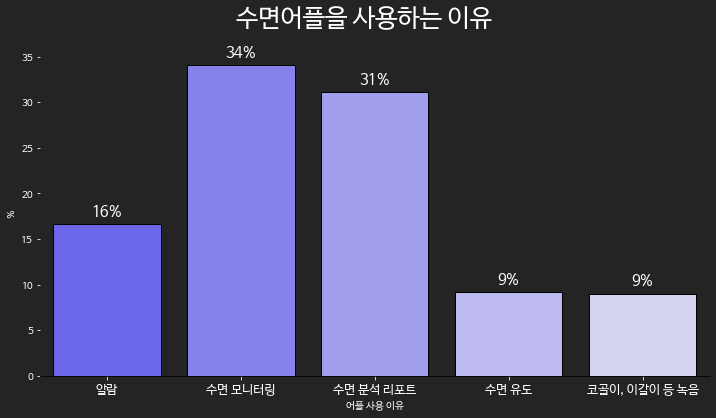

In [30]:
# 수면 모니터링, 수면 분석 리포트가 대부분
plt.figure(figsize=(12,6))
x = sns.barplot(data = reason_df, x='이유', y='수', palette = colors,
            estimator = lambda x: sum(x) / reason_df['수'].sum() *100,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{str(int(height)) + '%'}",(left+width/2, height+1), ha = 'center', size =15, color = 'white')
plt.xlabel('어플 사용 이유',color='white')
plt.ylabel('%',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('수면어플을 사용하는 이유', size = 25,color='white')
plt.show()

### what 어플 for 수면유도

In [31]:
rival2=sleep[sleep['이유-수면 유도']==1]
rival2.head(1)

,나이,성별,직장,수면어려움정도,워치유저,워치착용슬립,어플사용유무,어플명,어플사용이유,잠필요시기,해결법,잠필요시기1,해결법1,어플-슬립사이클,어플-필로우,어플-오토슬립,어플-슬립지,어플-슬립워치,어플-스노어랩,어플-슬립모니터,어플-SaA,어플-삼성,어플-워치,어플-애플,어플-샤오미,어플-calm,어플-Asmr,어플-유튜브,어플-기타,연령대,이유-알람,이유-수면 모니터링,이유-수면 분석 리포트,이유-수면 유도,"이유-코골이, 이갈이 등 녹음"
11,29,여성,직장인,8,1,1,1,슬립사이클,"알람, 수면 모니터링, 수면 유도",매일..?,"침대에서 아예 반대 방향으로 누워서 자거나, 졸릴 때까지 영상을 봅니다.",NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,1,1,0,1,0


In [32]:
#'어플-슬립사이클', '어플-필로우','어플-오토슬립', '어플-슬립지', '어플-슬립워치', '어플-스노어랩', '어플-슬립모니터', '어플-SaA','어플-삼성',
# '어플-워치', '어플-애플', '어플-샤오미', '어플-calm', '어플-Asmr', '어플-유튜브','어플-기타'
a1=sum(rival2['어플-슬립사이클'])
a2=sum(rival2['어플-필로우'])
a3=sum(rival2['어플-오토슬립'])
a4=sum(rival2['어플-슬립지'])
a5=sum(rival2['어플-슬립워치'])
a6=sum(rival2['어플-스노어랩'])
a7=sum(rival2['어플-슬립모니터'])
a8=sum(rival2['어플-SaA'])
a9=sum(rival2['어플-삼성'])
a10=sum(rival2['어플-워치'])
a11=sum(rival2['어플-애플'])
a12=sum(rival2['어플-샤오미'])
a13=sum(rival2['어플-calm'])
a14=sum(rival2['어플-Asmr'])
a15=sum(rival2['어플-유튜브'])
a16=sum(rival2['어플-기타'])

print(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16)

28 7 5 0 2 0 0 0 0 0 0 0 3 3 3 10


In [33]:
reason3=pd.DataFrame({
    "이유":['슬립사이클', '필로우','오토슬립', '슬립지', '슬립워치', '스노어랩', '슬립모니터', 'SaA','삼성','스마트워치', '애플', '샤오미', 'Calm', 'Asmr', '유튜브','기타'],
    "총계":[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]
})

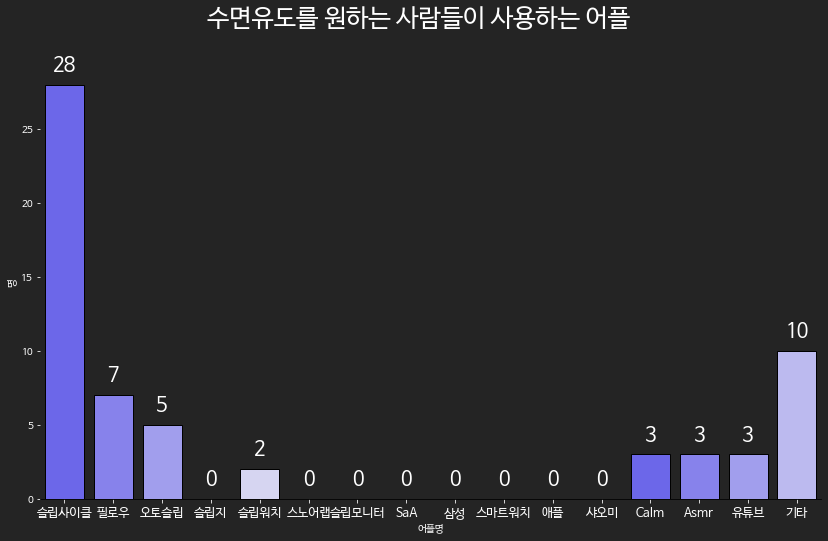

In [34]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="이유",y="총계",data=reason3,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플명',color='white') #x축단어설정, 흰색
plt.ylabel('명',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 

#제목설정
plt.suptitle('수면유도를 원하는 사람들이 사용하는 어플',color='white' ,size = 25)
plt.show()


8.calm 4 (calm, 명상, clam)

9.asmr (Asmr)

10.유튜브 (유튜브)

11.기타(기억, 런타스틱, 없음, 수면트래커, 슬립시어리, 트로스트, Sleep Time, SleepTime, 수면유도, 자연소리, 달팽이, Do i,Snoreclock, 알람몬, 가민, 슬립타운, Bettersleep, 네일)

---
기타로 묶어 버린 어플 중 한 어플에 쏠려있으면 어떡하지? 라는 생각으로 기타에 해당하는 데이터프레임 뽑아서 직접보자!


In [35]:
app_etc=sleep[(sleep['이유-수면 유도']==1)&(sleep['어플-기타']==1)]
app_etc['어플명'].value_counts()
#기억이 안난다이거나 자연소리, 소리어플!!

슬립사이클, 슬립시어리                 1
삭제한 지 꽤 되어 어플 이름이 기억이 안 남    1
기억 안남                        1
자연소리 재생어플                    1
트로스트                         1
기억안남                         1
기억이 안나요...                   1
기억이안남.                       1
수면유도음악  및 빗소리등               1
Bettersleep                  1
Name: 어플명, dtype: int64

**결론은 닥터도지의 목적인 수면유도를 원하는 사람들은 슬립사이클, 필로우, 오토슬립, 슬립워치, Calm, Asmr, 유튜브, 자연소리어플을 사용한다고 데이터에서 발견할 수 있다고 정리할 수 있었습니다!**

###what 어플 for 수면 모니터링

In [36]:
monitor=sleep[sleep['이유-수면 모니터링']==1]
monitor.head(1)

,나이,성별,직장,수면어려움정도,워치유저,워치착용슬립,어플사용유무,어플명,어플사용이유,잠필요시기,해결법,잠필요시기1,해결법1,어플-슬립사이클,어플-필로우,어플-오토슬립,어플-슬립지,어플-슬립워치,어플-스노어랩,어플-슬립모니터,어플-SaA,어플-삼성,어플-워치,어플-애플,어플-샤오미,어플-calm,어플-Asmr,어플-유튜브,어플-기타,연령대,이유-알람,이유-수면 모니터링,이유-수면 분석 리포트,이유-수면 유도,"이유-코골이, 이갈이 등 녹음"
2,24,여성,학생,6,0,0,1,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20대,0,1,0,0,0


In [37]:
#'어플-슬립사이클', '어플-필로우','어플-오토슬립', '어플-슬립지', '어플-슬립워치', '어플-스노어랩', '어플-슬립모니터', '어플-SaA','어플-삼성',
# '어플-워치', '어플-애플', '어플-샤오미', '어플-calm', '어플-Asmr', '어플-유튜브','어플-기타'
a1=sum(monitor['어플-슬립사이클'])
a2=sum(monitor['어플-필로우'])
a3=sum(monitor['어플-오토슬립'])
a4=sum(monitor['어플-슬립지'])
a5=sum(monitor['어플-슬립워치'])
a6=sum(monitor['어플-스노어랩'])
a7=sum(monitor['어플-슬립모니터'])
a8=sum(monitor['어플-SaA'])
a9=sum(monitor['어플-삼성'])
a10=sum(monitor['어플-워치'])
a11=sum(monitor['어플-애플'])
a12=sum(monitor['어플-샤오미'])
a13=sum(monitor['어플-calm'])
a14=sum(monitor['어플-Asmr'])
a15=sum(monitor['어플-유튜브'])
a16=sum(monitor['어플-기타'])

print(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16)

97 21 34 3 8 1 8 5 13 1 12 3 0 0 0 17


In [38]:
reason5=pd.DataFrame({
    "이유":['슬립사이클', '필로우','오토슬립', '슬립지', '슬립워치', '스노어랩', '슬립모니터', 'SaA','삼성','스마트워치', '애플', '샤오미', 'Calm', 'Asmr', '유튜브','기타'],
    "총계":[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]
})

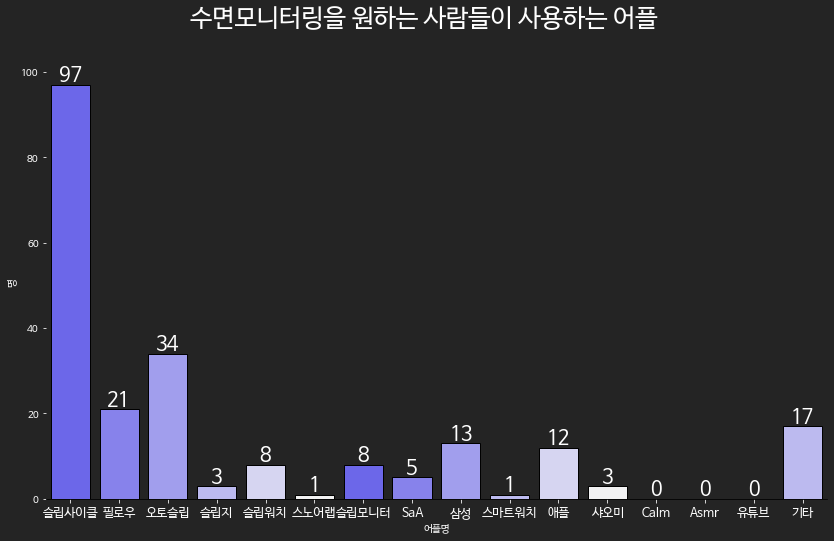

In [39]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="이유",y="총계",data=reason5,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플명',color='white') #x축단어설정, 흰색
plt.ylabel('명',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 

#제목설정
plt.suptitle('수면모니터링을 원하는 사람들이 사용하는 어플',color='white' ,size = 25)
plt.show()

### what 어플 for 수면 분석 리포트

In [40]:
anal=sleep[sleep['이유-수면 분석 리포트']==1]
#'어플-슬립사이클', '어플-필로우','어플-오토슬립', '어플-슬립지', '어플-슬립워치', '어플-스노어랩', '어플-슬립모니터', '어플-SaA','어플-삼성',
# '어플-워치', '어플-애플', '어플-샤오미', '어플-calm', '어플-Asmr', '어플-유튜브','어플-기타'
a1=sum(anal['어플-슬립사이클'])
a2=sum(anal['어플-필로우'])
a3=sum(anal['어플-오토슬립'])
a4=sum(anal['어플-슬립지'])
a5=sum(anal['어플-슬립워치'])
a6=sum(anal['어플-스노어랩'])
a7=sum(anal['어플-슬립모니터'])
a8=sum(anal['어플-SaA'])
a9=sum(anal['어플-삼성'])
a10=sum(anal['어플-워치'])
a11=sum(anal['어플-애플'])
a12=sum(anal['어플-샤오미'])
a13=sum(anal['어플-calm'])
a14=sum(anal['어플-Asmr'])
a15=sum(anal['어플-유튜브'])
a16=sum(anal['어플-기타'])

print(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16)

83 19 33 5 6 1 9 4 14 1 12 1 1 0 0 18


In [41]:
reason6=pd.DataFrame({
    "이유":['슬립사이클', '필로우','오토슬립', '슬립지', '슬립워치', '스노어랩', '슬립모니터', 'SaA','삼성','스마트워치', '애플', '샤오미', 'Calm', 'Asmr', '유튜브','기타'],
    "총계":[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]
})

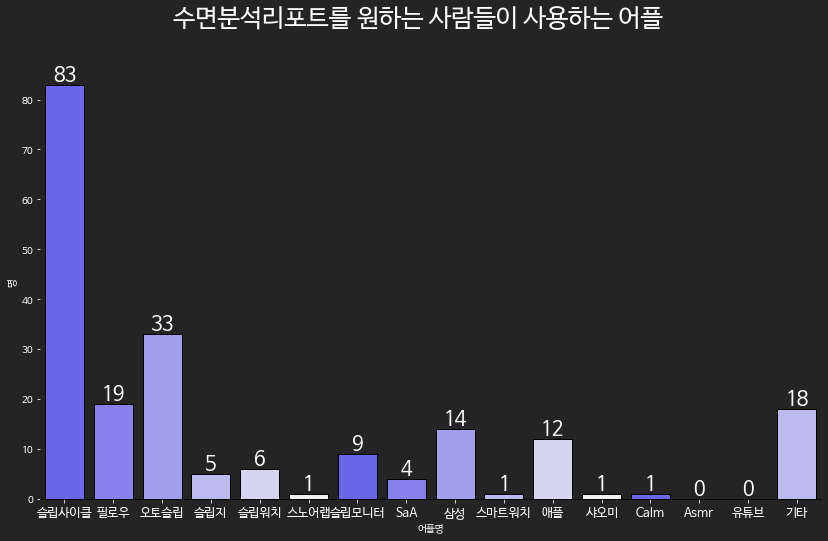

In [42]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="이유",y="총계",data=reason6,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플명',color='white') #x축단어설정, 흰색
plt.ylabel('명',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 

#제목설정
plt.suptitle('수면분석리포트를 원하는 사람들이 사용하는 어플',color='white' ,size = 25)
plt.show()

In [43]:
app_etc=sleep[(sleep['이유-수면 분석 리포트']==1)&(sleep['어플-기타']==1)]
app_etc['어플명'].value_counts()
#

기억안남                                      3
슬립사이클, 슬립시어리                              1
기억안남 ㅠ                                    1
삼성헬스 슬립타운                                 1
기억이 안나용                                   1
기억이 안나요...                                1
슬립스네일                                     1
달팽이수면                                     1
슬립타운                                      1
삭제한 지 꽤 되어 어플 이름이 기억이 안 남                 1
Sleep Time (수면 주기 스마트 알람 시계)              1
가민                                        1
기억이 안나요                                   1
SleepTime                                 1
기억이 안나요ㅠ                                  1
슬립사이클도 썼고, calm이라는 명상 어플로 수면유도명상 애용해요!    1
Name: 어플명, dtype: int64

딱 수면유도만 목적인 어플은 Calm, Asmr어플(자연소리 등)인 것 같다고 알 수 있다. 
닥터도지는 수면유도가 주목적(주파, 잠오는 자연소리 등)이면서, 수면 리포트를 해주는 것 같다!
-> 데이터 결과로 보았을 때는, Calm, Asmr, 슬립사이클이 대표적인 경쟁사라고 판단할 수 있지 않을까 싶다.
+그래프좀더 자세히보면 어플 특징 더 자세히 알 수 있을듯 (BUT 이특징은 사람들이 어플의 목적을 알고 사용한다는 가정하에)

## 수면어플 별 사용 이유

In [45]:
new_reason_list = []
for i in reason_list:
    new_reason_list.append(i[3:])

app_reason_df = pd.DataFrame({'이유':new_reason_list})

for i in app_list:
    app_reason_list = []
    for j in reason_list:
        num = sleep[sleep[i]==1][j].sum()
        app_reason_list.append(num)
    app_reason_df[i[3:]] = app_reason_list

### 슬립사이클을 사용하는 이유

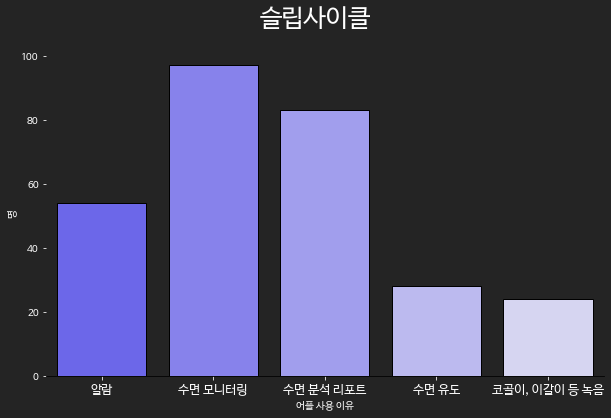

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data = app_reason_df, x = '이유', y = '슬립사이클', palette = colors,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플 사용 이유',color='white')
plt.ylabel('명',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('슬립사이클',color='white' ,size = 25)
plt.show()

### 필로우를 사용하는 이유

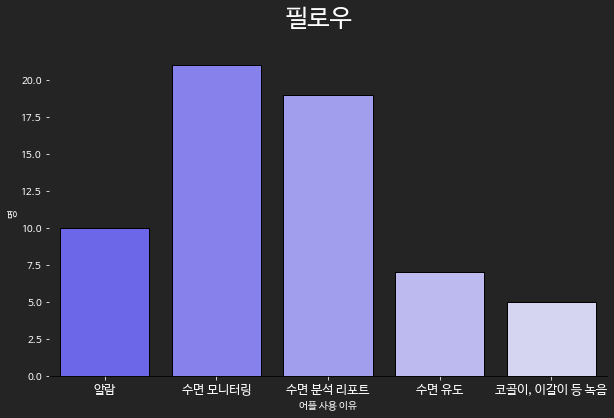

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data = app_reason_df, x = '이유', y = '필로우', palette = colors,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플 사용 이유',color='white')
plt.ylabel('명',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('필로우',color='white' ,size = 25)
plt.show()

### 오토슬립을 사용하는 이유

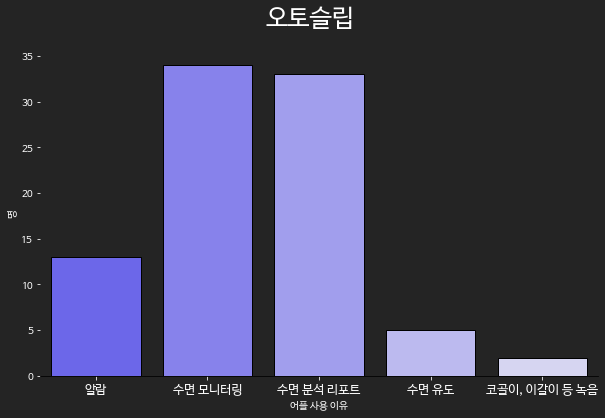

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(data = app_reason_df, x = '이유', y = '오토슬립', palette = colors,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플 사용 이유',color='white')
plt.ylabel('명',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('오토슬립',color='white' ,size = 25)
plt.show()

### 삼성을 사용하는 이유

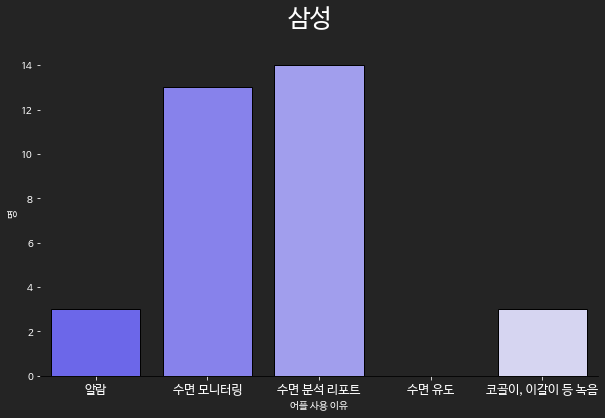

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(data = app_reason_df, x = '이유', y = '삼성', palette = colors,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플 사용 이유',color='white')
plt.ylabel('명',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('삼성',color='white' ,size = 25)
plt.show()

### calm을 사용하는 이유

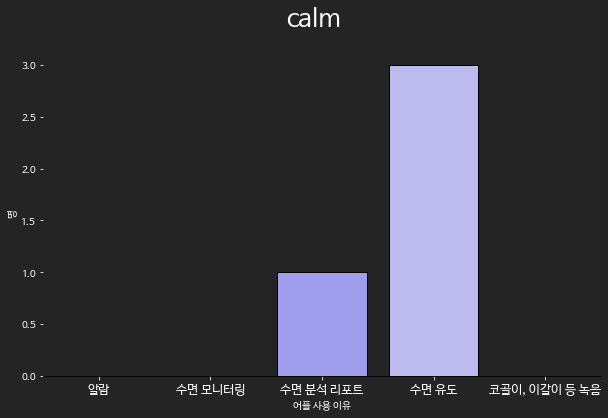

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(data = app_reason_df, x = '이유', y = 'calm', palette = colors,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플 사용 이유',color='white')
plt.ylabel('명',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('calm',color='white' ,size = 25)
plt.show()

### Asmr을 사용하는 이유

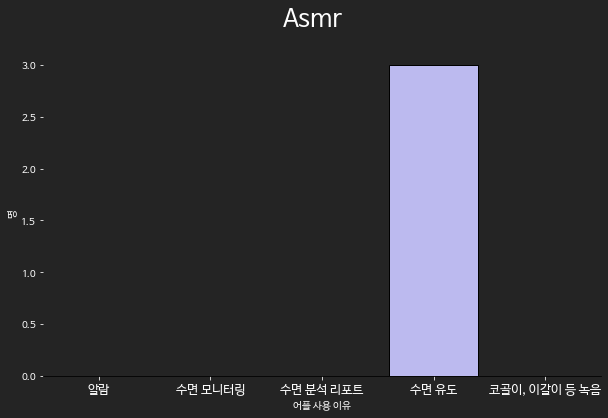

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(data = app_reason_df, x = '이유', y = 'Asmr', palette = colors,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플 사용 이유',color='white')
plt.ylabel('명',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('Asmr',color='white' ,size = 25)
plt.show()

### 유튜브를 사용하는 이유

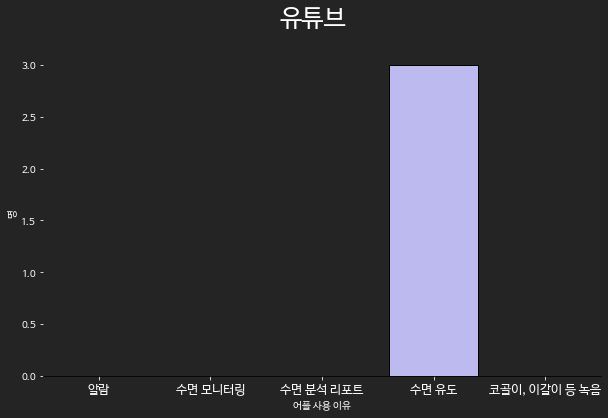

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(data = app_reason_df, x = '이유', y = '유튜브', palette = colors,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플 사용 이유',color='white')
plt.ylabel('명',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('유튜브',color='white' ,size = 25)
plt.show()

### 스노어랩을 사용하는 이유

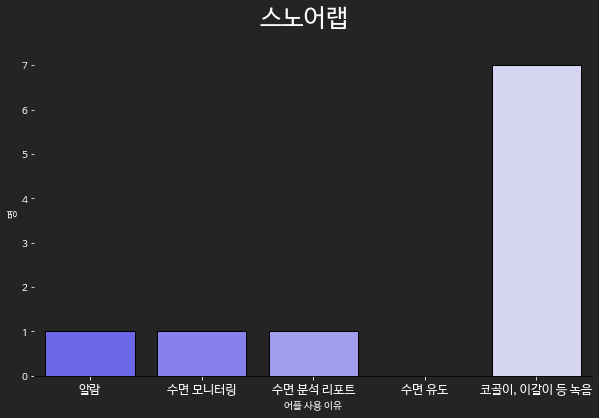

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(data = app_reason_df, x = '이유', y = '스노어랩', palette = colors,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플 사용 이유',color='white')
plt.ylabel('명',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('스노어랩',color='white' ,size = 25)
plt.show()

#수면 문제 자각 정도

**수면에 어려움을 겪는 사람들이 실제로 어플을 사용할지 체크!!!!!**

In [54]:
a1=len(sleep[sleep['수면어려움정도']==1])
a2=len(sleep[sleep['수면어려움정도']==2])
a3=len(sleep[sleep['수면어려움정도']==3])
a4=len(sleep[sleep['수면어려움정도']==4])
a5=len(sleep[sleep['수면어려움정도']==5])
a6=len(sleep[sleep['수면어려움정도']==6])
a7=len(sleep[sleep['수면어려움정도']==7])
a8=len(sleep[sleep['수면어려움정도']==8])
a9=len(sleep[sleep['수면어려움정도']==9])
a10=len(sleep[sleep['수면어려움정도']==10])

In [55]:
self_ref=pd.DataFrame({
    "수면어려움정도":[1,2,3,4,5,6,7,8,9,10],
    "사용률":[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]
})

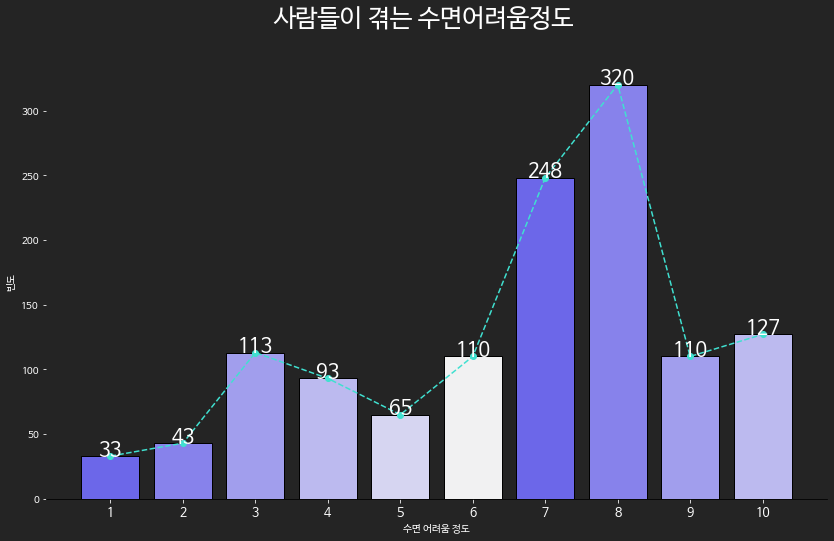

In [56]:
#수면어려움정도 체크 확인(자기 스스로 판단한 기준!)
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.countplot(x="수면어려움정도",data=sleep,palette=colors,edgecolor='black')
plt.plot("사용률",data=self_ref, color='turquoise',
         linestyle='--', marker='o')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('수면 어려움 정도',color='white') #x축단어설정, 흰색
plt.ylabel('빈도',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 

#제목설정
plt.suptitle('사람들이 겪는 수면어려움정도',color='white' ,size = 25)
plt.show()

##수면 어려움 정도에 따른 사용률! 구하기

In [57]:
#수면어려움 정도가 1인 사람들의 어플사용률
tot1=len(sleep[sleep['수면어려움정도']==1])
use1=len(sleep[(sleep['수면어려움정도']==1)&(sleep['어플사용유무']==1)])
perce1=use1/tot1*100
perce1

21.21212121212121

In [58]:
#수면어려움 정도가 2인 사람들의 어플사용률
tot2=len(sleep[sleep['수면어려움정도']==2])
use2=len(sleep[(sleep['수면어려움정도']==2)&(sleep['어플사용유무']==1)])
perce2=use2/tot2*100
perce2

20.930232558139537

In [59]:
#수면어려움 정도가 3인 사람들의 어플사용률
tot3=len(sleep[sleep['수면어려움정도']==3])
use3=len(sleep[(sleep['수면어려움정도']==3)&(sleep['어플사용유무']==1)])
perce3=use3/tot3*100
perce3

21.238938053097346

In [61]:
#수면어려움 정도가 4인 사람들의 어플사용률
tot4=len(sleep[sleep['수면어려움정도']==4])
use4=len(sleep[(sleep['수면어려움정도']==4)&(sleep['어플사용유무']==1)])
perce4=use4/tot4*100
perce4

21.50537634408602

In [60]:
#수면어려움 정도가 5인 사람들의 어플사용률
tot5=len(sleep[sleep['수면어려움정도']==5])
use5=len(sleep[(sleep['수면어려움정도']==5)&(sleep['어플사용유무']==1)])
perce5=use5/tot5*100
perce5

16.923076923076923

In [62]:
#수면어려움 정도가 6인 사람들의 어플사용률
tot6=len(sleep[sleep['수면어려움정도']==6])
use6=len(sleep[(sleep['수면어려움정도']==6)&(sleep['어플사용유무']==1)])
perce6=use6/tot6*100
perce6

28.18181818181818

In [63]:
#수면어려움 정도가 7인 사람들의 어플사용률
tot7=len(sleep[sleep['수면어려움정도']==7])
use7=len(sleep[(sleep['수면어려움정도']==7)&(sleep['어플사용유무']==1)])
perce7=use7/tot7*100
perce7

28.225806451612907

In [64]:
#수면어려움 정도가 8인 사람들의 어플사용률
tot8=len(sleep[sleep['수면어려움정도']==8])
use8=len(sleep[(sleep['수면어려움정도']==8)&(sleep['어플사용유무']==1)])
perce8=use8/tot8*100
perce8

30.9375

In [65]:
#수면어려움 정도가 9인 사람들의 어플사용률
tot9=len(sleep[sleep['수면어려움정도']==9])
use9=len(sleep[(sleep['수면어려움정도']==9)&(sleep['어플사용유무']==1)])
perce9=use9/tot9*100
perce9

33.63636363636363

In [66]:
#수면어려움 정도가 10인 사람들의 어플사용률
tot10=len(sleep[sleep['수면어려움정도']==10])
use10=len(sleep[(sleep['수면어려움정도']==10)&(sleep['어플사용유무']==1)])
perce10=use10/tot10*100
perce10

31.496062992125985

In [67]:
self_ref=pd.DataFrame({
    "수면어려움정도":[1,2,3,4,5,6,7,8,9,10],
    "사용률":[perce1,perce2,perce3,perce4,perce5,perce6,perce7,perce8,perce9,perce10]
})

In [68]:
self_ref

,수면어려움정도,사용률
0,1,21.212121
1,2,20.930233
2,3,21.238938
3,4,21.505376
4,5,16.923077
5,6,28.181818
6,7,28.225806
7,8,30.937500
8,9,33.636364
9,10,31.496063


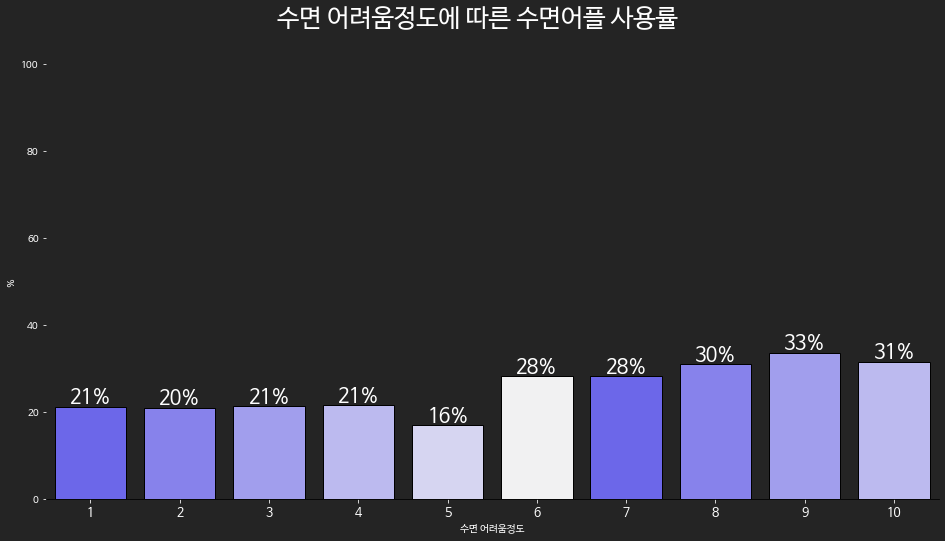

In [69]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(16,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="수면어려움정도",y="사용률",data=self_ref,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}%",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('수면 어려움정도',color='white') #x축단어설정, 흰색
plt.ylabel('%',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 

plt.ylim(0,100)
#제목설정
plt.suptitle('수면 어려움정도에 따른 수면어플 사용률',color='white' ,size = 25)
plt.show()

In [70]:
print(np.corrcoef(self_ref['수면어려움정도'],self_ref['사용률']))

[[1.         0.84034564]
 [0.84034564 1.        ]]


<Figure size 720x576 with 0 Axes>

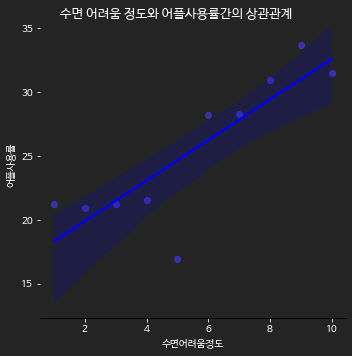

[[1.         0.84034564]
 [0.84034564 1.        ]]


In [71]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

sns.lmplot(x='수면어려움정도',y='사용률',data=self_ref, scatter_kws={"color":"#3C37C9"},
          line_kws={"color":"blue"})

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.xlabel('수면어려움정도',color='white') #x축단어설정, 흰색
plt.ylabel('어플사용률',color='white') #x축단어설정, 흰색
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색

#제목설정
plt.suptitle('수면 어려움 정도와 어플사용률간의 상관관계',color='white' ,size =13)
plt.show()

print(np.corrcoef(self_ref['수면어려움정도'],self_ref['사용률']))

# ⭐ **단어 빈도분석**

###잠 안올 때 해결법(어플 사용X) 


In [72]:
sleepp=sleep[sleep['해결법1'].notna()]
sleepp['해결법1']

0                                      누워서 뒤척인다
1       캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭
3                                        수면음악듣기
4                                 일단 누워서 버텨봅니다ㅜ
6                                      피곤하게 만든다
                         ...                   
1260                                        커튼 
1261                               편안한 수면 매트 교체
1262                                     유튜브 시청
1263                  속으로 숫자 세리거나 그냥 눈감고 가만히 있음
1264                          유튜브 보다가 눈이 감길때 잔다
Name: 해결법1, Length: 893, dtype: object

In [73]:
sleepp=sleepp.reset_index()

In [74]:
#해결법1 리스트 하나에 싹다 담기!
solve1=[]
for i in range (0,len(sleepp)):
  solve1.append(sleepp['해결법1'][i])
print(solve1)

['누워서 뒤척인다', '캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭', '수면음악듣기', '일단 누워서 버텨봅니다ㅜ', '피곤하게 만든다', '잠을 자지 않는다', '눈 감고 오디오북/asmr 듣기', '눈감고있기', '유튜브를 틀어놓고 보다가 스스륵 잠들길 기도', 'ASMR틀어놓는다', '유튜브 장시간 틀어두고 잠', '무조건 눈감고있기', '잘때까지 스마트폰을 붙잡고 있는다 ', '숫자를세곤하죠', '낮잠', '누워서 잔잔한 영상보기', '맥주', '못잔적없음', '술마시기', '억지로 잘려고노력한다', '일찍 자려고 하거나 수면안대를 사용', '모닥불 ASMR ', '노래들으면서잠', '잠이들때 까지 깨어 있는다', '회사 점심시간에 쪽잠', '잠이 올때까지 기다렸다가 잠을 잔다. 일어나는 시간은 동일하개', '몸이 더 피곤해질때까지 유튜브를 틀어놓다가 한계일때 끄고 자거나 틀어놓고 보다가 잠든다', '피곤하면 에너지드링크 섭취', '기상.', 'Asmr 듣기, 잠 포기하기', '밤샘을해서 수면패턴을 맞춘다', '그냥 침대에 계속 누워있습니다', 'Asmr틀어놓기', '유튜브 틀어둠', '잠이 올 때까지 불 끄고 누워있거나 휴대폰을 함', '유튜브에서 Asmr듣기', '음악 감상', '눈을 감고 최대한 자려고 노력한다 ..', 'Asmr을 듣는다', '운동 등 몸을 최대한 피곤하게 만들어요!', '유투브에서 asmr듣기', 'Asmr 듣기', '유튜브 백색소음', '잠이 올때까지 기다린다', '수면유도 음악 틀고 자기', '유투브 수면 음악', '기다림 ', '따뜻한 물로 씻고 나와서 유튜브로 음악을 듣습니다', '자세를 바꿈', '낮잠을 잠', '인터넷 써핑', '유투브 수면음악', '음악을 듣는다.간단한 스트래칭', '강압적으로', '유튜브 영상에서 수면 유도 영상을 틀어요(요즘은 거의 매일)', '조용한 티비시청', '유튜브에서 조용한 음악 리스트를 찾아 듣는 편', '맥주2캔마시기', '계속 눈 감고 있는다', '명상

In [75]:
import re
!pip install konlpy
import konlpy
import pandas as pd

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 62.8 MB/s 


In [76]:
solve1 = "".join(solve1)
print(solve1)

누워서 뒤척인다캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭수면음악듣기일단 누워서 버텨봅니다ㅜ피곤하게 만든다잠을 자지 않는다눈 감고 오디오북/asmr 듣기눈감고있기유튜브를 틀어놓고 보다가 스스륵 잠들길 기도ASMR틀어놓는다유튜브 장시간 틀어두고 잠무조건 눈감고있기잘때까지 스마트폰을 붙잡고 있는다 숫자를세곤하죠낮잠누워서 잔잔한 영상보기맥주못잔적없음술마시기억지로 잘려고노력한다일찍 자려고 하거나 수면안대를 사용모닥불 ASMR 노래들으면서잠잠이들때 까지 깨어 있는다회사 점심시간에 쪽잠잠이 올때까지 기다렸다가 잠을 잔다. 일어나는 시간은 동일하개몸이 더 피곤해질때까지 유튜브를 틀어놓다가 한계일때 끄고 자거나 틀어놓고 보다가 잠든다피곤하면 에너지드링크 섭취기상.Asmr 듣기, 잠 포기하기밤샘을해서 수면패턴을 맞춘다그냥 침대에 계속 누워있습니다Asmr틀어놓기유튜브 틀어둠잠이 올 때까지 불 끄고 누워있거나 휴대폰을 함유튜브에서 Asmr듣기음악 감상눈을 감고 최대한 자려고 노력한다 ..Asmr을 듣는다운동 등 몸을 최대한 피곤하게 만들어요!유투브에서 asmr듣기Asmr 듣기유튜브 백색소음잠이 올때까지 기다린다수면유도 음악 틀고 자기유투브 수면 음악기다림 따뜻한 물로 씻고 나와서 유튜브로 음악을 듣습니다자세를 바꿈낮잠을 잠인터넷 써핑유투브 수면음악음악을 듣는다.간단한 스트래칭강압적으로유튜브 영상에서 수면 유도 영상을 틀어요(요즘은 거의 매일)조용한 티비시청유튜브에서 조용한 음악 리스트를 찾아 듣는 편맥주2캔마시기계속 눈 감고 있는다명상 호흡그냥 눈 감고 누워있거나 수면 안대, 릴렉싱 스프레이 등 사용그런일은 없슴쪽잠그냥 이불 덮으면 잠이 옵니다그냥눈감고있는다
유튜브 asmr 영상 시청드라이기 asmr을 듣습니다.옆으로 누워서 잔다특별이 카페인음료 줄인다해결못해요ㅠ졸릴때까지 휴대폰을해요없음.수면유도 음악이 나오는 유튜브를 듣습니다그냥 눈을 감는다눈감고있기따뜻한  우유 마신다.무작정 누워있음해결 못함 뜬눈으로 평소 자는 시간까지 시간 보냄.눈감고 대기그런 

In [77]:
okt = konlpy.tag.Okt()
solve1_pos = okt.pos(solve1)
print(solve1_pos)

[('누워서', 'Verb'), ('뒤척', 'Noun'), ('인', 'Suffix'), ('다', 'Josa'), ('캐모마일', 'Noun'), ('티', 'Noun'), ('마시기', 'Noun'), (',', 'Punctuation'), ('온', 'Modifier'), ('열', 'Modifier'), ('안대', 'Noun'), ('착용', 'Noun'), (',', 'Punctuation'), ('마사지', 'Noun'), ('등', 'Noun'), ('몸', 'Noun'), ('을', 'Josa'), ('풀어주는', 'Verb'), ('스트레칭', 'Noun'), ('수면', 'Noun'), ('음악', 'Noun'), ('듣기', 'Noun'), ('일단', 'Noun'), ('누워서', 'Verb'), ('버텨', 'Verb'), ('봅니다', 'Verb'), ('ㅜ', 'KoreanParticle'), ('피곤하게', 'Adjective'), ('만든다', 'Verb'), ('잠', 'Noun'), ('을', 'Josa'), ('자지', 'Noun'), ('않는다', 'Verb'), ('눈', 'Noun'), ('감고', 'Noun'), ('오디오북', 'Noun'), ('/', 'Punctuation'), ('asmr', 'Alpha'), ('듣기', 'Noun'), ('눈감고있기', 'Verb'), ('유튜브', 'Noun'), ('를', 'Josa'), ('틀어놓고', 'Verb'), ('보다가', 'Verb'), ('스스륵', 'Noun'), ('잠들길', 'Verb'), ('기도', 'Noun'), ('ASMR', 'Alpha'), ('틀어놓는다', 'Verb'), ('유튜브', 'Noun'), ('장시간', 'Noun'), ('틀어', 'Verb'), ('두고', 'Verb'), ('잠무', 'Noun'), ('조건', 'Noun'), ('눈감고', 'Verb'), ('있기잘', 'Adjective'), ('때', 'Noun')

In [78]:
solve1_nove = list([word for word, pos in solve1_pos if (pos=='Verb')|(pos=='Noun')])
print(solve1_nove)

['누워서', '뒤척', '캐모마일', '티', '마시기', '안대', '착용', '마사지', '등', '몸', '풀어주는', '스트레칭', '수면', '음악', '듣기', '일단', '누워서', '버텨', '봅니다', '만든다', '잠', '자지', '않는다', '눈', '감고', '오디오북', '듣기', '눈감고있기', '유튜브', '틀어놓고', '보다가', '스스륵', '잠들길', '기도', '틀어놓는다', '유튜브', '장시간', '틀어', '두고', '잠무', '조건', '눈감고', '때', '스마트폰', '붙잡고', '숫자', '곤', '낮잠', '누워서', '영상', '보기', '맥주', '못잔', '적', '술', '마시기', '억지로', '잘려고', '노력', '일찍', '자려고', '거나', '면안', '사용', '모닥불', '노래', '들으면서', '잠잠이', '들', '때', '깨어', '회사', '점심시간', '쪽', '잠잠이', '때', '기다렸다가', '잠', '잔다', '일어나는', '시간', '개몸', '더', '때', '유튜브', '틀어놓다가', '한계', '때', '끄고', '자거나', '틀어놓고', '보다가', '잠든다', '에너지드링크', '섭취', '기상', '듣기', '잠', '포기', '하기', '밤샘', '을해', '수면', '패턴', '맞춘', '다그', '침대', '계속', '누워있습니다', '틀어놓기', '유튜브', '틀', '어둠', '잠', '올', '때', '불', '끄고', '누워있거나', '휴대폰', '함', '유튜브', '듣기', '음악', '감상', '눈', '감고', '최대한', '자려고', '노력', '한다', '듣는', '다운동', '등', '몸', '최대한', '만들어요', '유투브', '듣기', '듣기', '유튜브', '백색소음', '잠', '때', '기다린다수면', '유도', '음악', '틀', '자기', '유투브', '수면', '음악', '기다림', '물', '씻고', '나와서', '유

In [79]:
stop_words = ['한다','합니다','올','하기','그냥','계속','다그','최대한','하고','일단']
unique_solve1_nove = set(solve1_nove)
for word in unique_solve1_nove:
    if word in stop_words or len(word) == 1:
        while word in solve1_nove:
            solve1_nove.remove(word)

In [80]:
from collections import Counter
c = Counter(solve1_nove)
print(c)

Counter({'유튜브': 115, '감고': 66, '수면': 63, '영상': 47, '잔다': 44, '음악': 39, '유도': 38, '듣기': 37, '노력': 35, '핸드폰': 35, '노래': 33, '눈감고': 28, '틀어놓고': 26, '생각': 26, '휴대폰': 25, '커피': 25, '낮잠': 23, '누워서': 22, '시청': 21, '본다': 19, '듣는다': 18, '졸릴': 18, '억지로': 17, '명상': 17, '누워있는다': 17, '뒤척': 16, '자려고': 16, '해결': 16, '자기': 15, '기다린다': 15, '누워있기': 14, '보다가': 13, '시간': 13, '보기': 12, '방법': 12, '일어나서': 12, '소리': 12, '듣는': 11, '운동': 11, '듣거나': 11, '자거나': 10, '다음': 10, '마시기': 9, '거나': 9, '포기': 9, '침대': 9, '유투브': 9, '듣습니다': 9, '감는다': 9, '다른': 9, '쪽잠': 9, '두고': 8, '끄고': 8, '호흡': 8, '무작정': 8, '다시': 8, '잡니다': 8, '하루': 8, '샌다': 8, '안대': 7, '스트레칭': 7, '틀어놓기': 7, '몰아서': 7, '마시고': 7, '틀어': 6, '스마트폰': 6, '맥주': 6, '카페인': 6, '우유': 6, '마신다': 6, '평소': 6, '다가': 6, '하려고': 6, '드려고': 6, '경우': 6, '먹는다': 6, '들으며': 6, '먹고': 6, '잠들': 6, '자지': 5, '틀어놓는다': 5, '섭취': 5, '누워있습니다': 5, '감상': 5, '백색소음': 5, '자세': 5, '자는': 5, '안자고': 5, '상상': 5, '늦게': 5, '누워': 5, '하다가': 5, '오는': 5, '해서': 5, '졸리': 5, '에너지': 5, '라디오': 5, '자고': 5, '착용': 4, '

In [81]:
#워드클라우드 환경설정
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

In [82]:
#NanumBarunGothic체 파일을 드라이브에 저장해주시고 꼭 글씨체 위치를 지정해주셔야합니다!
FONT_PATH = '/content/gdrive/My Drive/DSL/NanumBarunGothic.ttf'

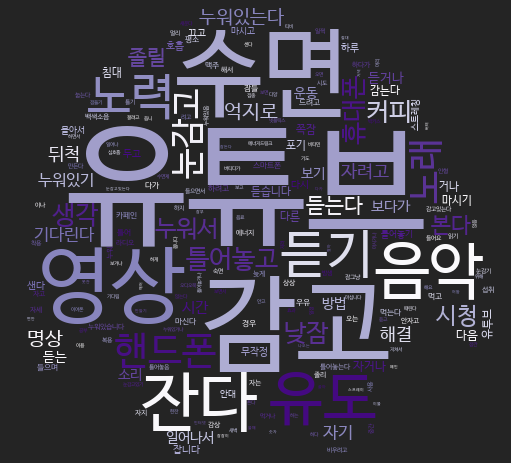

In [83]:
import requests 
from wordcloud import ImageColorGenerator

img = plt.imread(r'/content/gdrive/My Drive/DSL/dozy.jpeg')
wordcloud1 = WordCloud(
        font_path=FONT_PATH,
        background_color="#242424",
        random_state=1,
        colormap="Purples",        
        mask=img
)
wordcloud1.generate_from_frequencies(c)
wordcloud1.to_image()

In [84]:
tot_solve=pd.DataFrame({
    "word":solve1_nove
})
tot_solve['count']=1
tot_solve=tot_solve.groupby(by=['word'],as_index=False).count()
tot_solve=tot_solve.sort_values(by='count',ascending=False).head(30)
tot_solve

,word,count
561,유튜브,115
8,감고,66
434,수면,63
519,영상,47
631,잔다,44
566,음악,39
557,유도,38
192,듣기,37
863,핸드폰,35
97,노력,35


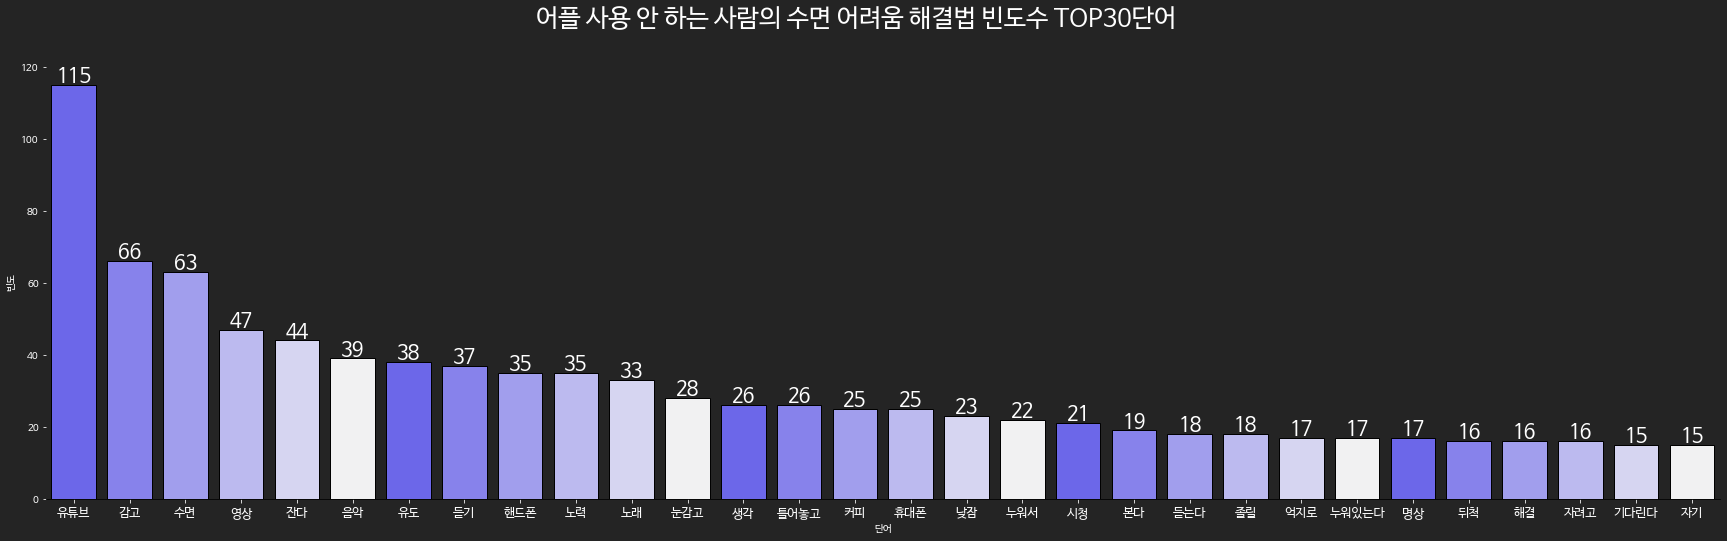

In [85]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(30,8))

colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="word",y="count", data=tot_solve,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
#빈도달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('단어',color='white') #x축단어설정, 흰색
plt.ylabel('빈도',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 



plt.suptitle('어플 사용 안 하는 사람의 수면 어려움 해결법 빈도수 TOP30단어', size = 25,color='white')
plt.show()

###잠 필요 시기(어플 사용X) 

In [86]:
sleepp=sleep[sleep['잠필요시기1'].notna()]
sleepp['잠필요시기1']

0             근무 시간이 길 때
1                   숙취해소
3                     매일
4       마감이 많이 몰리는 월말 월초
6                     지금
              ...       
1260                 평상시
1261                 매주중
1262                 언제나
1263       몸이 아플때, 방학기간때
1264             항상 필요하다
Name: 잠필요시기1, Length: 914, dtype: object

In [87]:
sleepp=sleepp.reset_index()

In [88]:
#잠필요시기1 리스트 하나에 싹다 담기!
time1=[]
for i in range (0,len(sleepp)):
  time1.append(sleepp['잠필요시기1'][i])
print(time1)

['근무 시간이 길 때', '숙취해소', '매일', '마감이 많이 몰리는 월말 월초', '지금', '수면 패턴이 깨졌을 때', '평일', '자기전', '그냥 평소 전부 다', '시험기간', '매일 밤', '출근전날', '시험기간', '잘시간', '중요한 일이 있을때', '피곤할때', '자격증 준비 기간, 출근 전 취침', '일찍 어딘가 가야할때 ex)여행', '평일', '시헌기간', '더 일찍 일어나야하는 상황', '중요회의 전날', '일요일', '바쁜 일정을 소화할때 (컨퍼런스, 대회, 시험기간, 강의 내용 준비)', '이직 준비기간', '출근 전날', '평소 잠이 드는데 시간이 오래 걸려요. 바이오리듬에 맞는 수면 패턴이 있다고 하는데, 닥터도지가 솔루션이 되길 바랍니다!', '몸은 피곤한데 잠이 안오는 순간', '시험기간, 알바 때', '여행 전 날.', '시험 기간', '시험기간', '평일', '항상', '매일', '오전에 일정이 있을 때', '회사 서류제출할 때', '시험기간', '시험 기간', '알바전날', '시험기간', '매일', '매일', '낮잠', '시험기간', '밤', '바쁜 일정 속에 낮잠이나 밤에 잘때', '밤', '중요한 일이 있기 전날이나, 체력적으로 힘든 시기.', '매일', '평소', '퇴근후', '밤', '피곤할때', '매일', '매일', '토요일저녁 ', '다음 날 중요한 시험이나 면접이 있을 때', '프로젝트진행기간중', '새벽', '새벽기상', '다음날 일찍 나가야 할 때', '저녁', '육체피로', '졸릴때', '평소에', '수업 시간', '시험기간', '다음날 근무설때', '매일편안한숙면을하고싶다', '항상', '다음날 일찍일어나야할때', '다음날 약속이 있을때', '평일에 직장의 피로를 풀기 위해', '잠자는 시간', '밤', '스트레스 쌓일때', '밤낮 바뀌었을 때', '다음날 아침 일찍 일이 있어서 자고 싶을 때 ', '잘때', '매일', '언제나이긴하지만 학생이다보니 특히 시험기간에 잠을 가장 자고싶긴하죠 ㅎㅎ',

In [89]:
time1 = "".join(time1)
print(time1)

근무 시간이 길 때숙취해소매일마감이 많이 몰리는 월말 월초지금수면 패턴이 깨졌을 때평일자기전그냥 평소 전부 다시험기간매일 밤출근전날시험기간잘시간중요한 일이 있을때피곤할때자격증 준비 기간, 출근 전 취침일찍 어딘가 가야할때 ex)여행평일시헌기간더 일찍 일어나야하는 상황중요회의 전날일요일바쁜 일정을 소화할때 (컨퍼런스, 대회, 시험기간, 강의 내용 준비)이직 준비기간출근 전날평소 잠이 드는데 시간이 오래 걸려요. 바이오리듬에 맞는 수면 패턴이 있다고 하는데, 닥터도지가 솔루션이 되길 바랍니다!몸은 피곤한데 잠이 안오는 순간시험기간, 알바 때여행 전 날.시험 기간시험기간평일항상매일오전에 일정이 있을 때회사 서류제출할 때시험기간시험 기간알바전날시험기간매일매일낮잠시험기간밤바쁜 일정 속에 낮잠이나 밤에 잘때밤중요한 일이 있기 전날이나, 체력적으로 힘든 시기.매일평소퇴근후밤피곤할때매일매일토요일저녁 다음 날 중요한 시험이나 면접이 있을 때프로젝트진행기간중새벽새벽기상다음날 일찍 나가야 할 때저녁육체피로졸릴때평소에수업 시간시험기간다음날 근무설때매일편안한숙면을하고싶다항상다음날 일찍일어나야할때다음날 약속이 있을때평일에 직장의 피로를 풀기 위해잠자는 시간밤스트레스 쌓일때밤낮 바뀌었을 때다음날 아침 일찍 일이 있어서 자고 싶을 때 잘때매일언제나이긴하지만 학생이다보니 특히 시험기간에 잠을 가장 자고싶긴하죠 ㅎㅎ시험기간매일시험 기간, 학회 프로젝트 준비 기간, 아플 때매일 밤평소에 늘항상 필요해요 ㅠㅠ매일야근몇일하다보면 잠 몰아서 자줘야합니다시험 기간꾸준한 공부시간을 유지해야할때밤시험기간이나 과제기간스트레스 받을 때 / 어쩌다 커피 마셨을 때술 마신 다음날 아침피곤할때낮잠을 잔 날 밤 / 술먹은 다음 날주말 낮잠매일특별히 없다시험기간매일매일TV 시청시험기간항상항상특별히 필요한 순간은 없지만 매일매일 컨디션 관리를 위해 규칙적인 수면 습관이 필요하다는 생각을 합니다.시험기갘시험기간평상시출근하는날회사중요한이슈가있어 연차를 쓰지 못하고 반드시 일찍 일어나야할때시험 기간잠 설친 다음날불면증평일 

In [90]:
okt = konlpy.tag.Okt()
time1_pos = okt.pos(time1)
print(time1_pos)

[('근무', 'Noun'), ('시간', 'Noun'), ('이', 'Josa'), ('길', 'Noun'), ('때', 'Noun'), ('숙취', 'Noun'), ('해소', 'Noun'), ('매일', 'Noun'), ('마감', 'Noun'), ('이', 'Josa'), ('많이', 'Adverb'), ('몰리는', 'Verb'), ('월말', 'Noun'), ('월초', 'Noun'), ('지', 'Josa'), ('금수면', 'Noun'), ('패턴', 'Noun'), ('이', 'Josa'), ('깨졌을', 'Verb'), ('때', 'Noun'), ('평일', 'Noun'), ('자', 'Suffix'), ('기전', 'Noun'), ('그냥', 'Noun'), ('평소', 'Noun'), ('전부', 'Noun'), ('다', 'Adverb'), ('시험', 'Noun'), ('기간', 'Noun'), ('매일', 'Noun'), ('밤', 'Noun'), ('출근', 'Noun'), ('전날', 'Noun'), ('시험', 'Noun'), ('기간', 'Noun'), ('잘', 'Verb'), ('시간', 'Noun'), ('중요한', 'Adjective'), ('일이', 'Modifier'), ('있을', 'Adjective'), ('때', 'Noun'), ('피곤할', 'Adjective'), ('때', 'Noun'), ('자격증', 'Noun'), ('준비', 'Noun'), ('기간', 'Noun'), (',', 'Punctuation'), ('출근', 'Noun'), ('전', 'Noun'), ('취침', 'Noun'), ('일찍', 'Noun'), ('어딘가', 'Noun'), ('가야', 'Noun'), ('할', 'Verb'), ('때', 'Noun'), ('ex', 'Alpha'), (')', 'Punctuation'), ('여행', 'Noun'), ('평일', 'Noun'), ('시', 'Modifier'), ('헌', '

In [91]:
time1_nove = list([word for word, pos in time1_pos if (pos=='Verb')|(pos=='Noun')])
print(time1_nove)

['근무', '시간', '길', '때', '숙취', '해소', '매일', '마감', '몰리는', '월말', '월초', '금수면', '패턴', '깨졌을', '때', '평일', '기전', '그냥', '평소', '전부', '시험', '기간', '매일', '밤', '출근', '전날', '시험', '기간', '잘', '시간', '때', '때', '자격증', '준비', '기간', '출근', '전', '취침', '일찍', '어딘가', '가야', '할', '때', '여행', '평일', '기간', '더', '일찍', '일어나야하는', '상황', '회의', '전날', '일요일', '일정', '소화', '할', '때', '컨퍼런스', '대회', '시험', '기간', '강의', '내용', '준비', '이직', '준비', '기간', '출근', '전날', '평소', '잠', '드는데', '시간', '걸려요', '바이오리듬', '맞는', '수면', '패턴', '하는데', '닥터', '도지', '솔루션', '되길', '바랍니다', '몸', '잠', '오는', '순간', '시험', '기간', '알바', '때', '여행', '전', '날', '시험', '기간', '시험', '기간', '평일', '항상', '매일', '오전', '일정', '때', '회사', '서류', '제출', '할', '때', '시험', '기간', '시험', '기간', '알바', '전날', '시험', '기간', '매일', '매일', '낮잠', '시험', '기간', '밤', '일정', '속', '낮잠', '밤', '잘', '때', '밤중', '요한', '전날', '체력', '시기', '평소', '퇴근', '후밤', '때', '매일', '매일', '토요일', '저녁', '다음', '날', '시험', '면접', '때', '프로젝트', '진행', '기간', '새벽', '새벽', '기상', '다음', '날', '일찍', '나가야', '할', '때', '저녁', '육체', '피로', '졸릴', '때', '평소', '수업', '시간', 

In [92]:
stop_words = ['일어나야','수면','가기','순간','위해','경우','하는']
unique_time1_nove = set(time1_nove)
for word in unique_time1_nove:
    if word in stop_words or len(word) == 1:
        while word in time1_nove:
            time1_nove.remove(word)

In [93]:
c = Counter(time1_nove)
print(c)

Counter({'시험': 367, '기간': 351, '매일': 61, '전날': 60, '다음': 56, '항상': 49, '일찍': 44, '평소': 37, '일정': 31, '아침': 25, '알바': 20, '시간': 17, '출근': 17, '스트레스': 17, '준비': 16, '새벽': 16, '운동': 16, '평상시': 15, '평일': 14, '약속': 14, '과제': 13, '수업': 12, '패턴': 11, '오전': 10, '규칙': 10, '마감': 9, '받을': 9, '하루': 9, '낮잠': 8, '퇴근': 8, '면접': 8, '내일': 8, '방학': 8, '끝나고': 8, '늦게': 8, '자고': 7, '생활': 7, '저녁': 6, '생각': 6, '일상': 6, '공부': 6, '학교': 6, '직전': 6, '근무': 5, '제출': 5, '피로': 5, '발표': 5, '요즘': 5, '직후': 5, '지금': 5, '고민': 5, '끝난': 5, '이후': 5, '와서': 5, '학기': 5, '자격증': 4, '여행': 4, '오는': 4, '시기': 4, '프로젝트': 4, '해야': 4, '앞두고': 4, '자야': 4, '월요일': 4, '일이': 4, '상태': 4, '때문': 4, '오후': 4, '되는': 4, '종일': 4, '오지': 4, '않을': 4, '실습': 4, '업무': 4, '집중': 4, '앞둔': 4, '필요': 4, '걱정': 4, '생리': 4, '일어나야하는': 3, '일요일': 3, '회사': 3, '체력': 3, '졸릴': 3, '간밤': 3, '밤낮': 3, '가장': 3, '유지': 3, '커피': 3, '마신': 3, '주말': 3, '컨디션': 3, '습관': 3, '불면증': 3, '밤샘': 3, '나서': 3, '쪽잠': 3, '마음': 3, '사실': 3, '잤을': 3, '자서': 3, '계속': 3, '머리': 3, '해서': 3, '않고': 3, '긴장

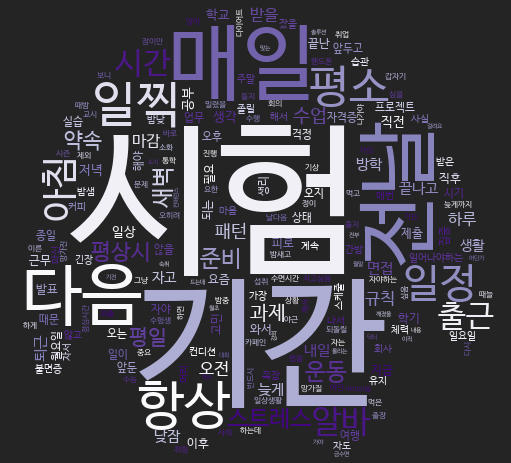

In [94]:
import requests 
from wordcloud import ImageColorGenerator

img = plt.imread(r'/content/gdrive/My Drive/DSL/dozy.jpeg')
wordcloud1 = WordCloud(
        font_path=FONT_PATH,
        background_color="#242424",
        random_state=1,
        colormap="Purples",        
        mask=img
)
wordcloud1.generate_from_frequencies(c)
wordcloud1.to_image()

In [95]:
tot_time=pd.DataFrame({
    "word":time1_nove
})
tot_time['count']=1
tot_time=tot_time.groupby(by=['word'],as_index=False).count()
tot_time=tot_time.sort_values(by='count',ascending=False).head(30)
tot_time

,word,count
254,시험,367
48,기간,351
141,매일,61
398,전날,60
93,다음,56
491,항상,49
351,일찍,44
466,평소,37
349,일정,31
274,아침,25


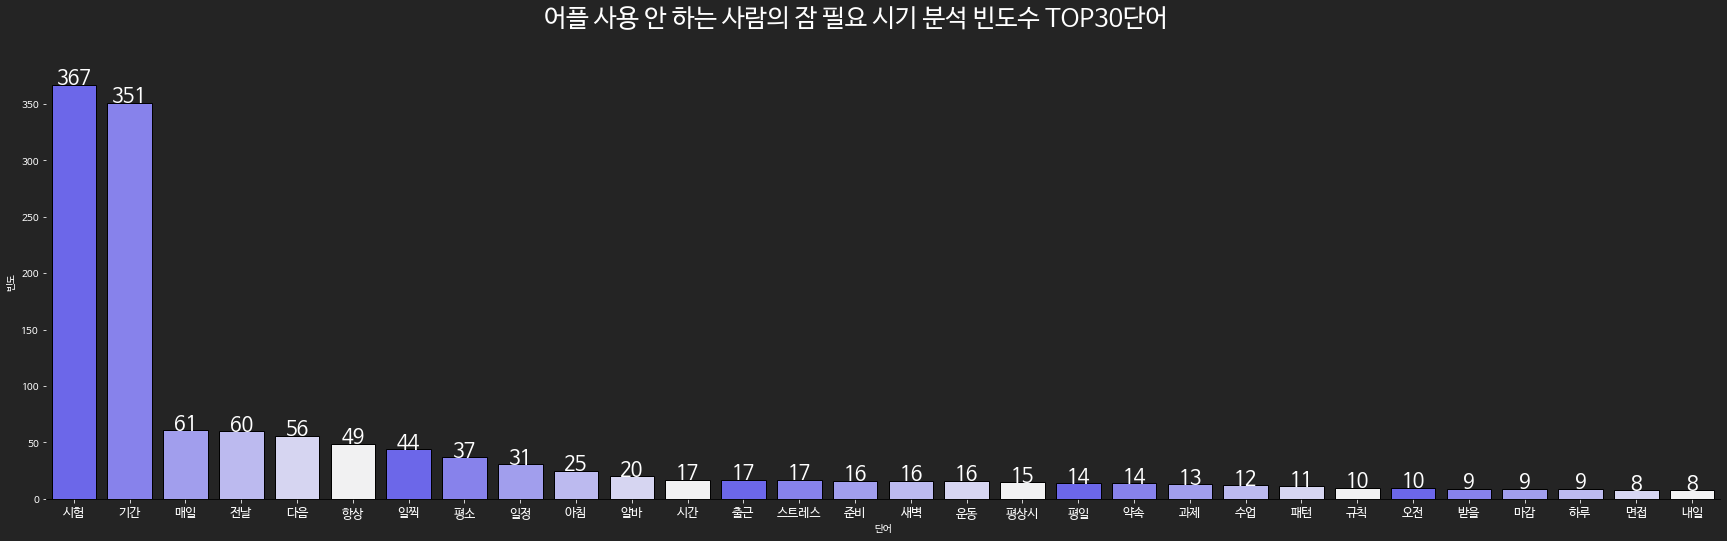

In [96]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(30,8))

colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="word",y="count", data=tot_time, palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
#빈도달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('단어',color='white') #x축단어설정, 흰색
plt.ylabel('빈도',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 

plt.suptitle('어플 사용 안 하는 사람의 잠 필요 시기 분석 빈도수 TOP30단어', color='white' ,size = 25)
plt.show()

###잠 안 올 때 해결법(어플 사용O)

In [97]:
sleepp=sleep[sleep['해결법'].notna()]
sleepp['해결법']

2                         잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다
5                                               호흡에 집중합니다
7                                       잠이 올 때까지 핸드폰을 한다.
8                  친구와 통화나 카톡하면 편한 친구의 익숙한 목소리가 잠오게 되더라고요
9                                                다음날 일찍잠듬
                              ...                        
1243    휴대폰을 붙들다가 새벽~아침에 잠든다. 수면유도이야기나 음악 등을 틀기도 한다. 아...
1250                                                버티기..
1252                                그냥 핸드폰을 떨어뜨려놓고 누워있는다.
1256                    잠을 아예 줄이고 다음날 아침일찍 카페인섭취하고 낮잠 안자기
1265                                               해결안함..
Name: 해결법, Length: 332, dtype: object

In [98]:
sleepp=sleepp.reset_index()

In [99]:
#해결법 리스트 하나에 싹다 담기!
solve1=[]
for i in range (0,len(sleepp)):
  solve1.append(sleepp['해결법'][i])
print(solve1)

['잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다', '호흡에 집중합니다', '잠이 올 때까지 핸드폰을 한다.', '친구와 통화나 카톡하면 편한 친구의 익숙한 목소리가 잠오게 되더라고요', '다음날 일찍잠듬', '수면제', '침대에서 아예 반대 방향으로 누워서 자거나, 졸릴 때까지 영상을 봅니다.', '핸드폰으로 가끔 노래 듣거나 파도 소라 듣기', '그냥 눈감고있는다', '이완명상을 한다', '강아지들 데리고 자요', '클래식 청취', '유도음악', '누워서 최대한 잠을 청하려 노력하는 편', '카페인 줄이기, 낮잠안자기', '뒤척거리거나 베게를 바꿔보거나 침대를 옆으로 누워보거나 이불을 바꿔본다', '하루를 제일 지치게 보낸다. ', '명상음악이나 자연소리믹싱어플, 백색소음 등등', '바디스캔명상', '술을 마십니다', '그냥 침대에 누워있음', '잠이 잘 드는 나만의 자세를 합니다. 엎드려서 왼팔에 얼굴을 묻는 자세에요 ', '아이마사지기를 하거나 온열안대를 차고잔다', '눈을 감고 있는다', '수면유도제 향초 음악 ', '3/7/8 호흡법, 안 될 때에는 아예 잠을 포기함.', '뒤척임', '포기하고 수면 후 다음 날 후회한다', '항상 피곤해서 잘 수 잇음', '오디오북 등 재생하면서 수면', '그냥 누워있는다', '정신과에서 불면증 약을 받아 먹고 있다\n마그네슘, 레시틴, 엽산 등을 챙겨먹고 있다\n잠이 올 때까지 다른 것을 한다\n수면유도제를 먹는다\n술을 먹는다\n', '따뜻한 물을 마시고 모든걸 셧다운 한다는 느낌으로 잠을 청함', '최대한 방을 어둡게한다', '해결을 못한다..ㅠ 못 자고 몸이 쇠약하면 가위 눌리고 또 스트레스 받아서 못 자고의 연속', '술한잔', '유튜브를 본다', '비타민 섭취', '이른 저녁식사, 운동, 수면유도 음악', '그래도 누워있거나 운동', '수면유도제 복용', '넷플릭스 보고 잠', '수면 어플 이용', '밤새기', 'asmr', '책 읽어주는 유투브', '자연소리 asmr', '휴일에 몰아자거나

In [100]:
solve1 = "".join(solve1)
print(solve1)

잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다호흡에 집중합니다잠이 올 때까지 핸드폰을 한다.친구와 통화나 카톡하면 편한 친구의 익숙한 목소리가 잠오게 되더라고요다음날 일찍잠듬수면제침대에서 아예 반대 방향으로 누워서 자거나, 졸릴 때까지 영상을 봅니다.핸드폰으로 가끔 노래 듣거나 파도 소라 듣기그냥 눈감고있는다이완명상을 한다강아지들 데리고 자요클래식 청취유도음악누워서 최대한 잠을 청하려 노력하는 편카페인 줄이기, 낮잠안자기뒤척거리거나 베게를 바꿔보거나 침대를 옆으로 누워보거나 이불을 바꿔본다하루를 제일 지치게 보낸다. 명상음악이나 자연소리믹싱어플, 백색소음 등등바디스캔명상술을 마십니다그냥 침대에 누워있음잠이 잘 드는 나만의 자세를 합니다. 엎드려서 왼팔에 얼굴을 묻는 자세에요 아이마사지기를 하거나 온열안대를 차고잔다눈을 감고 있는다수면유도제 향초 음악 3/7/8 호흡법, 안 될 때에는 아예 잠을 포기함.뒤척임포기하고 수면 후 다음 날 후회한다항상 피곤해서 잘 수 잇음오디오북 등 재생하면서 수면그냥 누워있는다정신과에서 불면증 약을 받아 먹고 있다
마그네슘, 레시틴, 엽산 등을 챙겨먹고 있다
잠이 올 때까지 다른 것을 한다
수면유도제를 먹는다
술을 먹는다
따뜻한 물을 마시고 모든걸 셧다운 한다는 느낌으로 잠을 청함최대한 방을 어둡게한다해결을 못한다..ㅠ 못 자고 몸이 쇠약하면 가위 눌리고 또 스트레스 받아서 못 자고의 연속술한잔유튜브를 본다비타민 섭취이른 저녁식사, 운동, 수면유도 음악그래도 누워있거나 운동수면유도제 복용넷플릭스 보고 잠수면 어플 이용밤새기asmr책 읽어주는 유투브자연소리 asmr휴일에 몰아자거나 낮잠,쪽잠 잡니다책을 읽는다/주파수영상을 틀어둔다/명상을 한다운동을 하거나 피곤한 상태를 유지하다가 잠듭니다수면유도 노래틀고자요눈 감고 그냥 누워있음커피로 잠을깬다침대 눕자마자 골아떨어져서 잠을 못자는 것에 대한 걱정은 없습니다. 다만, 수면의 질이 좋지 못한 것 같아 고민입니다. (참고로 개인정보 수집 이용 동의 ㅠ 이렇게 하시믄 안대여 ㅠ 수

In [101]:
okt = konlpy.tag.Okt()
solve1_pos = okt.pos(solve1)
print(solve1_pos)

[('잠', 'Noun'), ('이', 'Josa'), ('안', 'VerbPrefix'), ('오면', 'Verb'), ('어떤', 'Adjective'), ('방법', 'Noun'), ('을', 'Josa'), ('써도', 'Verb'), ('효과', 'Noun'), ('가', 'Josa'), ('없어서', 'Adjective'), ('그냥', 'Noun'), ('샙니다', 'Verb'), ('호흡', 'Noun'), ('에', 'Josa'), ('집중', 'Noun'), ('합니다', 'Verb'), ('잠', 'Noun'), ('이', 'Josa'), ('올', 'Verb'), ('때', 'Noun'), ('까지', 'Josa'), ('핸드폰', 'Noun'), ('을', 'Josa'), ('한다', 'Verb'), ('.', 'Punctuation'), ('친구', 'Noun'), ('와', 'Josa'), ('통화', 'Noun'), ('나', 'Josa'), ('카톡', 'Noun'), ('하면', 'Verb'), ('편한', 'Adjective'), ('친구', 'Noun'), ('의', 'Josa'), ('익숙한', 'Adjective'), ('목소리', 'Noun'), ('가', 'Josa'), ('잠오게', 'Verb'), ('되더라고요', 'Verb'), ('다음', 'Noun'), ('날', 'Noun'), ('일찍', 'Noun'), ('잠듬', 'Noun'), ('수면제', 'Noun'), ('침대', 'Noun'), ('에서', 'Josa'), ('아예', 'Noun'), ('반대', 'Noun'), ('방향', 'Noun'), ('으로', 'Josa'), ('누워서', 'Verb'), ('자거나', 'Verb'), (',', 'Punctuation'), ('졸릴', 'Verb'), ('때', 'Noun'), ('까지', 'Josa'), ('영상', 'Noun'), ('을', 'Josa'), ('봅니다', 'Verb'), ('.',

In [102]:
solve1_nove = list([word for word, pos in solve1_pos if (pos=='Verb')|(pos=='Noun')])
print(solve1_nove)

['잠', '오면', '방법', '써도', '효과', '그냥', '샙니다', '호흡', '집중', '합니다', '잠', '올', '때', '핸드폰', '한다', '친구', '통화', '카톡', '하면', '친구', '목소리', '잠오게', '되더라고요', '다음', '날', '일찍', '잠듬', '수면제', '침대', '아예', '반대', '방향', '누워서', '자거나', '졸릴', '때', '영상', '봅니다', '핸드폰', '가끔', '노래', '듣거나', '파도', '소라', '듣기', '그냥', '눈감고있는다', '이완', '명상', '한다', '강아지', '데리', '자', '클래식', '청취', '유도', '음악', '누워서', '최대한', '잠', '청', '하려', '노력', '하는', '편', '카페인', '줄이기', '낮잠', '안자기', '뒤척거리거나', '베게를', '바꿔', '보거나', '침대', '옆', '누워', '보거나', '이불', '바꿔', '본다', '하루', '제일', '지치게', '보낸다', '명상', '음악', '자연', '소리', '믹싱', '어플', '백색소음', '등등', '바디', '스캔', '상술', '마십니', '다그', '침대', '누워있음', '잠', '잘', '드는', '나', '자세', '합니다', '엎드려서', '팔', '얼굴', '묻는', '자세', '아이', '마사지', '기를', '거나', '안대', '차고', '잔다', '눈', '감고', '유도', '제', '향초', '음악', '호흡', '법', '안', '될', '때', '아예', '잠', '포기', '함', '뒤척임', '포기', '수면', '후', '다음', '날', '후회', '항상', '잘', '수', '잇음', '오디오북', '등', '재생', '하면서', '수면', '그냥', '누워있는다', '정신과', '불면증', '약', '받아', '먹고', '마그네슘', '레시틴', '엽산', '등', '챙겨', '먹고', '잠', '올'

In [103]:
stop_words = ['한다','합니다','올','하기','그냥','거나','보기','해서','보고','자는','하면','최대한','잔다','계속','다그','경우','방법','찾지','일단','하려고']
unique_solve1_nove = set(solve1_nove)
for word in unique_solve1_nove:
    if word in stop_words or len(word) == 1:
        while word in solve1_nove:
            solve1_nove.remove(word)

In [104]:
c = Counter(solve1_nove)
print(c)

Counter({'유튜브': 46, '수면': 44, '유도': 34, '영상': 25, '음악': 23, '핸드폰': 15, '감고': 15, '듣기': 14, '커피': 10, '생각': 10, '틀어놓고': 10, '듣거나': 9, '명상': 9, '낮잠': 8, '보거나': 8, '누워있는다': 8, '쪽잠': 8, '잡니다': 8, '자기': 8, '다음': 7, '졸릴': 7, '눈감고': 7, '누워있기': 7, '휴대폰': 7, '침대': 6, '누워서': 6, '노력': 6, '카페인': 6, '소리': 6, '자세': 6, '안대': 6, '포기': 6, '섭취': 6, '운동': 6, '사용': 6, '억지로': 6, '노래': 5, '다른': 5, '복용': 5, '밤샘': 5, '시청': 5, '시간': 5, '듣는다': 5, '해결': 5, '호흡': 4, '아예': 4, '누워': 4, '본다': 4, '먹고': 4, '넷플릭스': 4, '읽는다': 4, '산책': 4, '읽기': 4, '눈감고있기': 4, '하고': 4, '샙니다': 3, '자거나': 3, '하는': 3, '하루': 3, '어플': 3, '하면서': 3, '먹는다': 3, '자고': 3, '이용': 3, '밤새기': 3, '몰아서': 3, '틀기': 3, '마시기': 3, '심호흡': 3, '공부': 3, '일어나서': 3, '듣고': 3, '자려고': 3, '동영상': 3, '브레이': 3, '제이': 3, '잠들': 3, '감고있는다': 3, '읽거나': 3, '오면': 2, '친구': 2, '일찍': 2, '수면제': 2, '가끔': 2, '이완': 2, '강아지': 2, '클래식': 2, '청취': 2, '안자기': 2, '바꿔': 2, '보낸다': 2, '자연': 2, '백색소음': 2, '누워있음': 2, '향초': 2, '항상': 2, '오디오북': 2, '재생': 2, '챙겨': 2, '느낌': 2, '비타민': 2, '잠수': 2, '주파수': 2,

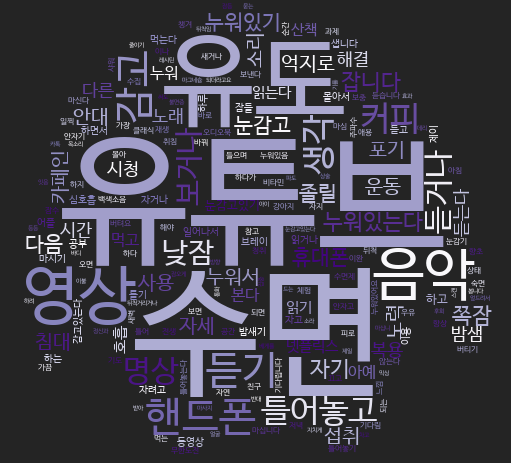

In [105]:
img = plt.imread(r'/content/gdrive/My Drive/DSL/dozy.jpeg')
wordcloud1 = WordCloud(
        font_path=FONT_PATH,
        background_color="#242424",
        random_state=1,
        colormap="Purples",        
        mask=img
)
wordcloud1.generate_from_frequencies(c)
wordcloud1.to_image()

In [106]:
tot_solve=pd.DataFrame({
    "word":solve1_nove
})
tot_solve['count']=1
tot_solve=tot_solve.groupby(by=['word'],as_index=False).count()
tot_solve=tot_solve.sort_values(by='count',ascending=False).head(30)
tot_solve

,word,count
338,유튜브,46
259,수면,44
334,유도,34
313,영상,25
341,음악,23
5,감고,15
502,핸드폰,15
109,듣기,14
460,틀어놓고,10
443,커피,10


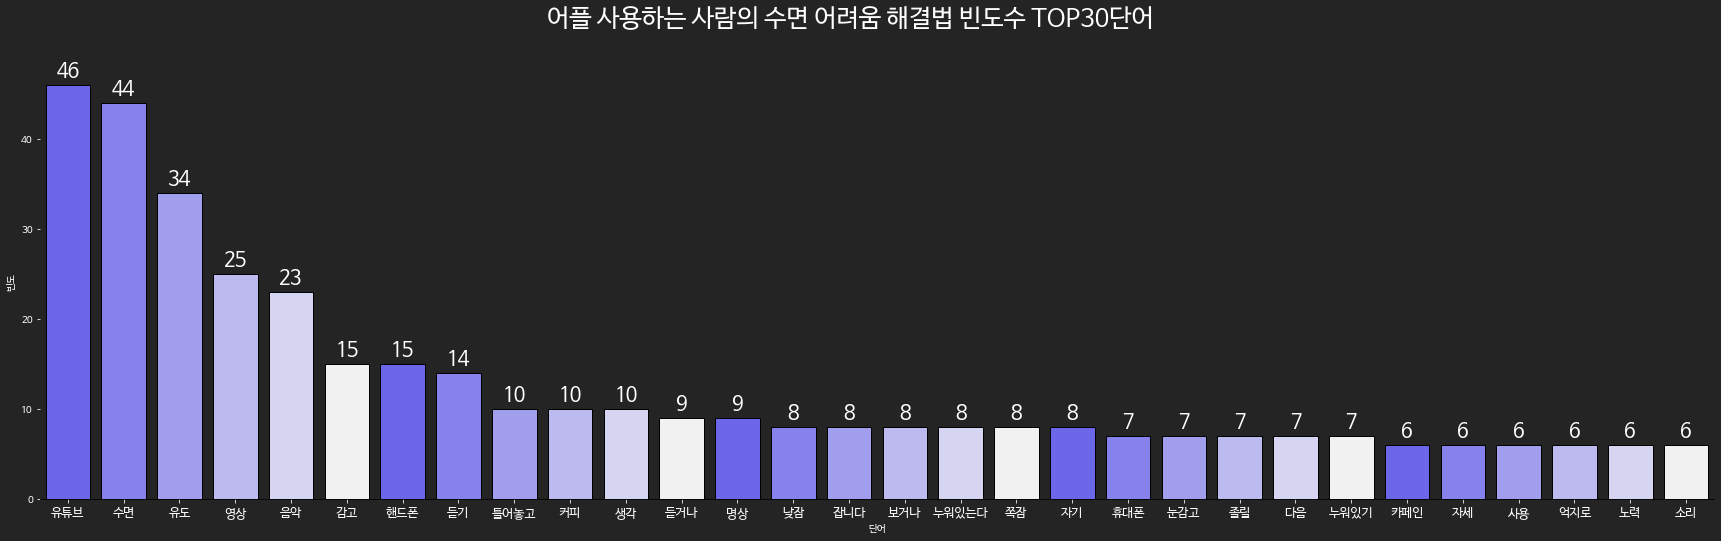

In [107]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(30,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="word",y="count", data=tot_solve,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
#빈도달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('단어',color='white') #x축단어설정, 흰색
plt.ylabel('빈도',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 
plt.suptitle('어플 사용하는 사람의 수면 어려움 해결법 빈도수 TOP30단어', color='white',size = 25)
plt.show()

###잠 필요 시기(어플사용O)

In [108]:
sleepp=sleep[sleep['잠필요시기'].notna()]
sleepp['잠필요시기']

2                             다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간
5       질문이 이해가 잘 안되는데, 시험기간이나 프로젝트 기간에 잠을 짧지만 효율적으로 자...
7                                                      평소
8                                                      평일
9                                                 밤낮이 바뀔때
                              ...                        
1243                    다음날 약속이 있을 때, 1교시 수업이 있을 때, 배고플 때
1250                                                 시험기간
1252                                       시험기간 및 체력관리 할때
1256                                                 시험기간
1265                                        잠 적게 잔 날 하루종일
Name: 잠필요시기, Length: 348, dtype: object

In [109]:
sleepp=sleepp.reset_index()

In [110]:
#잠필요시기 리스트 하나에 싹다 담기!
time1=[]
for i in range (0,len(sleepp)):
  time1.append(sleepp['잠필요시기'][i])
print(time1)

['다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간', '질문이 이해가 잘 안되는데, 시험기간이나 프로젝트 기간에 잠을 짧지만 효율적으로 자는게 좋습니다.', '평소', '평일', '밤낮이 바뀔때', '평소', '매일..?', '평일', '일하는 평일', '매일', '항상', '면접전날', '퇴근', '피곤할 때 (잠을 잘 못 잔 이후)', '중요한 미팅이나 약속이 있을때 (안자면 얼굴에 티가나서)', '항상', '매일', '다음날 새벽에 출근하는날', '늘', '일요일 밤', '다음 날 일찍 일어나야하는 날, 오전 9시 수업이 있기 하루 전 날', '항상 필요해요... 코골이와 이갈이가 심해서 그런지 매일이 자도자도 피곤해요', '매일', '시험기간', '매일', '평소 / 업무량이 매우 많기 때문', '시험기간', '일이 몰린 날, 전날에 효율적으로 잠을 자지 못한 날, 심적으로 불안할 때', '매일', '학기 초, 학기 말 행정 업무가 쏟아질 때', '금', '매 순간', '시험기간', '등교 기간, 시험 기간', '프레젠테이션 전날', '밤을 샌날이나 많이 걸은날', '과제로 인해 며칠간 못 자서 이러다 죽는 게 아닐까 싶을 때', '피곤할때', '항상', '야근 후', '중요한 미팅을 앞두고 있을때', '그냥 항상...', '알바 후 수면패턴 맞출때', '매일', '내일 일찍 출근 날', '시험기간, 실습기간', '매일', '생활 패턴 맞추기(아침에 일찍 일어나기)', '수면 패턴이 망가졌을 때', '중요한 날 전날', '과제가 몰렸을 때', '시험기간, 운동 후', '스트레스 및 업무가 많을 때', '평상시', '시험 기간', '주중 (출퇴근에너지소모때문)', '항상.... ', '일요일에서 월요일 넘어갈때', '시험 기간', '일요일저녁', '중요한 스케쥴 전날', '주말', '항상', '매일 매일. 늦게잡니다', '매일', '밤샘 후', '시험기간', '근무날', '시험기간, 피곤한 날', '시험공부중이라 평소에', '다음날출근', '시험, 과

In [111]:
time1 = "".join(time1)
print(time1)

다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간질문이 이해가 잘 안되는데, 시험기간이나 프로젝트 기간에 잠을 짧지만 효율적으로 자는게 좋습니다.평소평일밤낮이 바뀔때평소매일..?평일일하는 평일매일항상면접전날퇴근피곤할 때 (잠을 잘 못 잔 이후)중요한 미팅이나 약속이 있을때 (안자면 얼굴에 티가나서)항상매일다음날 새벽에 출근하는날늘일요일 밤다음 날 일찍 일어나야하는 날, 오전 9시 수업이 있기 하루 전 날항상 필요해요... 코골이와 이갈이가 심해서 그런지 매일이 자도자도 피곤해요매일시험기간매일평소 / 업무량이 매우 많기 때문시험기간일이 몰린 날, 전날에 효율적으로 잠을 자지 못한 날, 심적으로 불안할 때매일학기 초, 학기 말 행정 업무가 쏟아질 때금매 순간시험기간등교 기간, 시험 기간프레젠테이션 전날밤을 샌날이나 많이 걸은날과제로 인해 며칠간 못 자서 이러다 죽는 게 아닐까 싶을 때피곤할때항상야근 후중요한 미팅을 앞두고 있을때그냥 항상...알바 후 수면패턴 맞출때매일내일 일찍 출근 날시험기간, 실습기간매일생활 패턴 맞추기(아침에 일찍 일어나기)수면 패턴이 망가졌을 때중요한 날 전날과제가 몰렸을 때시험기간, 운동 후스트레스 및 업무가 많을 때평상시시험 기간주중 (출퇴근에너지소모때문)항상.... 일요일에서 월요일 넘어갈때시험 기간일요일저녁중요한 스케쥴 전날주말항상매일 매일. 늦게잡니다매일밤샘 후시험기간근무날시험기간, 피곤한 날시험공부중이라 평소에다음날출근시험, 과제 많을 때, 스트레스 상황평소새벽지금 이순간일이 많이 몰리는 연말시험기간기말, 중간기간담날 일하러 갈때매일인생이 힘들때.. 우울하고 생각이 많을때일요일 밤늦게 잠을 잘때스트레스 받을 때매일 밤시험기간시험기간밤 늦게 운동하고 온 직후 또는 그날 밤 수면시험 기간매일바쁠 때??항상 일상너무 피곤할때(몸이 안좋을때)생활패턴이 바뀔때(3교대근무)시험기간피곤할땨출근전고민거리가 많은 시기(잡생각이 많아서 잠이 안옴)요즘이요. 아르바이트 때문에 새벽에 강제기상해야됩다. 이런생활도 벌써 1년째. 정신병 걸릴 것 같아요.

In [112]:
okt = konlpy.tag.Okt()
time1_pos = okt.pos(time1)
print(time1_pos)

[('다음', 'Noun'), ('날', 'Noun'), ('일정', 'Noun'), ('이', 'Josa'), ('많고', 'Adjective'), ('몸', 'Noun'), ('을', 'Josa'), ('많이', 'Adverb'), ('쓸', 'Verb'), ('때', 'Noun'), (',', 'Punctuation'), ('시험', 'Noun'), ('기간', 'Noun'), ('질문', 'Noun'), ('이', 'Josa'), ('이해', 'Noun'), ('가', 'Josa'), ('잘', 'Verb'), ('안되는데', 'Adjective'), (',', 'Punctuation'), ('시험', 'Noun'), ('기간', 'Noun'), ('이나', 'Josa'), ('프로젝트', 'Noun'), ('기간', 'Noun'), ('에', 'Josa'), ('잠', 'Noun'), ('을', 'Josa'), ('짧지만', 'Adjective'), ('효율', 'Noun'), ('적', 'Suffix'), ('으로', 'Josa'), ('자는게', 'Verb'), ('좋습니다', 'Adjective'), ('.', 'Punctuation'), ('평소', 'Noun'), ('평일', 'Noun'), ('밤낮', 'Noun'), ('이', 'Josa'), ('바뀔', 'Verb'), ('때', 'Noun'), ('평소', 'Noun'), ('매일', 'Noun'), ('..?', 'Punctuation'), ('평일', 'Noun'), ('일하는', 'Verb'), ('평일', 'Noun'), ('매', 'Modifier'), ('일', 'Modifier'), ('항상', 'Noun'), ('면접', 'Noun'), ('전날', 'Noun'), ('퇴근', 'Noun'), ('피곤할', 'Adjective'), ('때', 'Noun'), ('(', 'Punctuation'), ('잠', 'Noun'), ('을', 'Josa'), ('잘', 'Verb'

In [113]:
#adjective + verb + noun
time1_novead = list([word for word, pos in time1_pos if (pos=='Verb')|(pos=='Noun')|(pos=='Adjective')])
print(time1_novead)

['다음', '날', '일정', '많고', '몸', '쓸', '때', '시험', '기간', '질문', '이해', '잘', '안되는데', '시험', '기간', '프로젝트', '기간', '잠', '짧지만', '효율', '자는게', '좋습니다', '평소', '평일', '밤낮', '바뀔', '때', '평소', '매일', '평일', '일하는', '평일', '항상', '면접', '전날', '퇴근', '피곤할', '때', '잠', '잘', '못', '잔', '이후', '중요한', '미팅', '약속', '있을', '때', '안자면', '얼굴', '티', '가나', '항상', '매일', '다음', '날', '새벽', '출근', '하는', '날늘', '일요일', '밤', '다음', '날', '일찍', '일어나야하는', '날', '오전', '수업', '있기', '하루', '전', '날', '항상', '필요해요', '코', '골이와', '이갈이', '심해서', '그런지', '매일', '자도', '자도', '피곤해요', '매일', '시험', '기간', '매일', '평소', '업', '무량', '매우', '많기', '때문', '시험', '기간', '일이', '몰린', '날', '전날', '효율', '잠', '자지', '못', '날', '심', '불안할', '때', '학기', '초', '학기', '말', '행정', '업무', '쏟아질', '때금매', '순간', '시험', '기간', '등교', '기간', '시험', '기간', '프레', '젠', '테이', '션', '전날', '밤', '샌', '날', '걸은', '날', '과제', '인해', '며칠', '못', '자서', '이러다', '죽는', '게', '아닐까', '싶을', '때', '피곤할', '때', '항상', '야근', '후', '중요한', '미팅', '앞두고', '있을', '때', '그냥', '항상', '알바', '후', '수면', '패턴', '맞출', '때', '내일', '일찍', '출근', '날', '시험', '기간', '실습

In [114]:
stop_words = ['때','있을','다음','필요해요','자고','있는','자도','심해서','그냥','하는']
unique_time1_novead = set(time1_novead)
for word in unique_time1_novead:
    if word in stop_words or len(word) == 1:
        while word in time1_novead:
            time1_novead.remove(word)

In [115]:
c = Counter(time1_novead)
print(c)

Counter({'시험': 144, '기간': 135, '매일': 25, '평소': 18, '항상': 16, '스트레스': 16, '중요한': 15, '전날': 12, '일찍': 12, '일정': 11, '수면': 11, '패턴': 11, '새벽': 9, '시간': 8, '평일': 7, '피곤할': 7, '약속': 7, '평상시': 7, '출근': 6, '일요일': 6, '순간': 6, '과제': 6, '아침': 6, '많을': 6, '이후': 5, '오전': 5, '수업': 5, '알바': 5, '주말': 5, '받을': 5, '하루': 4, '때문': 4, '학기': 4, '생활': 4, '늦게': 4, '생각': 4, '일상': 4, '규칙': 4, '자야': 4, '준비': 4, '바뀔': 3, '바쁠': 3, '낮잠': 3, '스케줄': 3, '컨디션': 3, '프로젝트': 2, '효율': 2, '밤낮': 2, '면접': 2, '미팅': 2, '일어나야하는': 2, '있기': 2, '일이': 2, '업무': 2, '싶을': 2, '야근': 2, '앞두고': 2, '운동': 2, '에너지': 2, '월요일': 2, '피곤한': 2, '공부': 2, '힘들': 2, '직후': 2, '안좋을': 2, '거리': 2, '자는': 2, '불면증': 2, '방학': 2, '받았을': 2, '가장': 2, '일어나야': 2, '힘든': 2, '바뀌었을': 2, '좋을': 2, '경우': 2, '위해': 2, '필요': 2, '적게': 2, '자려고': 2, '짧게': 2, '야간': 2, '없을': 2, '피곤한데': 2, '많고': 1, '질문': 1, '이해': 1, '안되는데': 1, '짧지만': 1, '자는게': 1, '좋습니다': 1, '일하는': 1, '퇴근': 1, '안자면': 1, '얼굴': 1, '가나': 1, '날늘': 1, '골이와': 1, '이갈이': 1, '그런지': 1, '피곤해요': 1, '무량': 1, '매우': 1, '많기': 1, 

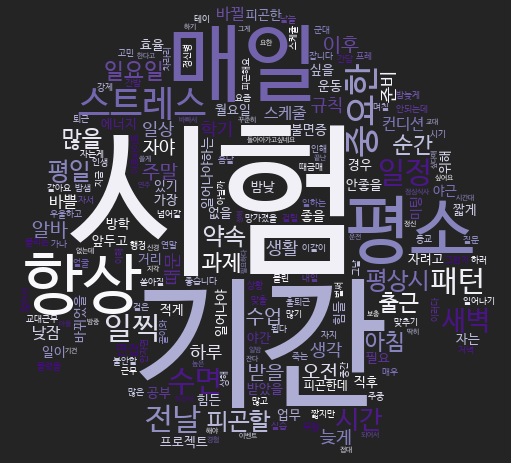

In [116]:
img = plt.imread(r'/content/gdrive/My Drive/DSL/dozy.jpeg')
wordcloud1 = WordCloud(
        font_path=FONT_PATH,
        background_color="#242424",
        random_state=1,
        colormap="Purples",        
        mask=img
)
wordcloud1.generate_from_frequencies(c)
wordcloud1.to_image()

In [117]:
tot_time=pd.DataFrame({
    "word":time1_novead
})
tot_time['count']=1
tot_time=tot_time.groupby(by=['word'],as_index=False).count()
tot_time=tot_time.sort_values(by='count',ascending=False).head(30)
tot_time

,word,count
152,시험,144
29,기간,135
81,매일,25
305,평소,18
331,항상,16
146,스트레스,16
279,중요한,15
257,전날,12
229,일찍,12
138,수면,11


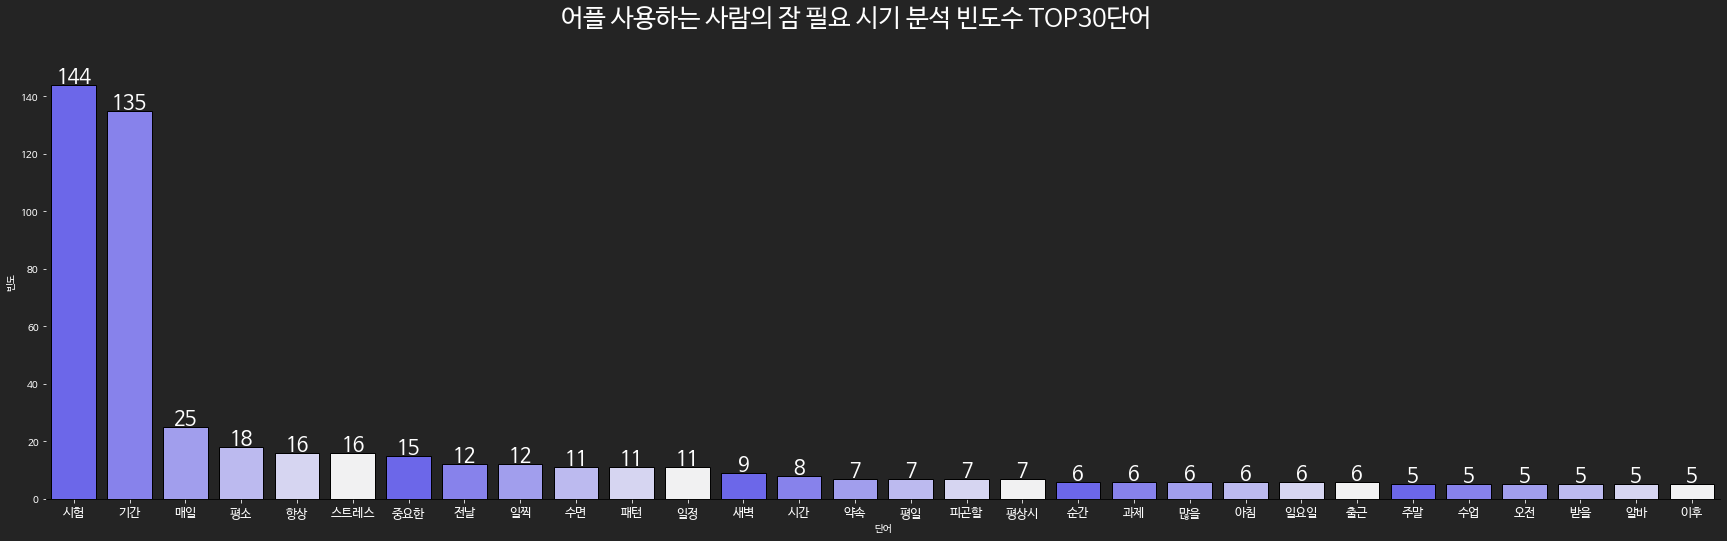

In [118]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(30,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="word",y="count", data=tot_time, palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
#빈도달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('단어',color='white') #x축단어설정, 흰색
plt.ylabel('빈도',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 
plt.suptitle('어플 사용하는 사람의 잠 필요 시기 분석 빈도수 TOP30단어', color='white', size = 25)
plt.show()